In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import matplotlib.cm as cm
import seaborn as sns

In [70]:
# CARGA DE BASES DE DATOS

sus19 = pd.read_parquet("2019/bd_sustentantes_2019.parquet")
enc19 = pd.read_parquet("2019/bd_sustentantes_2019_encuesta.parquet")
opc19 = pd.read_parquet("2019/bd_opciones_educativas_2019.parquet")

sus20 = pd.read_parquet("2020/bd_sustentantes_2020.parquet")
enc20 = pd.read_parquet("2020/bd_sustentantes_2020_encuesta.parquet")
opc20 = pd.read_parquet("2020/bd_opciones_educativas_2020.parquet")

sus21 = pd.read_parquet("2021/bd_sustentantes_2021.parquet")
enc21 = pd.read_parquet("2021/bd_sustentantes_2021_encuesta.parquet")
opc21 = pd.read_parquet("2021/bd_opciones_educativas_2021.parquet")

sus22 = pd.read_parquet("2022/bd_sustentantes_2022.parquet")
enc22 = pd.read_parquet("2022/bd_sustentantes_2022_encuesta.parquet")
opc22 = pd.read_parquet("2022/bd_opciones_educativas_2022.parquet")

sus23 = pd.read_parquet("2023/bd_sustentantes_2023.parquet")
enc23 = pd.read_parquet("2023/bd_sustentantes_2023_encuesta.parquet")
opc23 = pd.read_parquet("2023/bd_opciones_educativas_2023.parquet")

### Aspirantes registrados por año

In [71]:
sus23['SUS_SEXO'] = sus23['SEXO']

# Bases de datos
sus1923 = [
    (2019, sus19),
    (2020, sus20),
    (2021, sus21),
    (2022, sus22),
    (2023, sus23)
]

# Bases de datos encuesta
enc1923 = [
    (2019, enc19),
    (2020, enc20),
    (2021, enc21),
    (2022, enc22),
    (2023, enc23)
]

# Presentaron examen
pres19 = sus19[sus19['PRE_EXA'] == 'S'].copy()
pres20 = sus20[sus20['PRE_EXA'] == 'S'].copy()
pres21 = sus21[sus21['PRE_EXA'] == 'S'].copy()
pres22 = sus22[sus22['PRE_EXA'] == 'S'].copy()
pres23 = sus23[sus23['PRE_EXA'] == 'S'].copy()

pres1923 = [
    (2019, pres19),
    (2020, pres20),
    (2021, pres21),
    (2022, pres22),
    (2023, pres23)
]
# Aceptados en el colbach
colbach = pd.concat(
    [
        df[df['ASIG_FIN'].fillna('').str.startswith('B0')].assign(AÑO=año)
        for año, df in sus1923
    ],
    ignore_index=True
)


# Colbach8
colbach8 = pd.concat(
    [df[df['ASIG_FIN'] == 'B008000'].assign(AÑO=año) for año, df in sus1923],
    ignore_index=True
)


In [72]:
sus19['INST_FIN']

0           D4
1           S1
2         None
3         None
4           S7
          ... 
310154      D4
310155      B0
310156      S7
310157      B0
310158      B0
Name: INST_FIN, Length: 310159, dtype: object

In [73]:
datos_agrupados = pd.DataFrame(
    [(año, round(len(lista),1)) for año, lista in sus1923],
    columns=["Año", "Número de aspirantes (Miles)"]
)

datos_agrupados.to_csv("Tablas/1.1 Aspirantes",index=False)

datos_agrupados

,Año,Número de aspirantes (Miles)
0,2019,310159
1,2020,302709
2,2021,275347
3,2022,282596
4,2023,286572


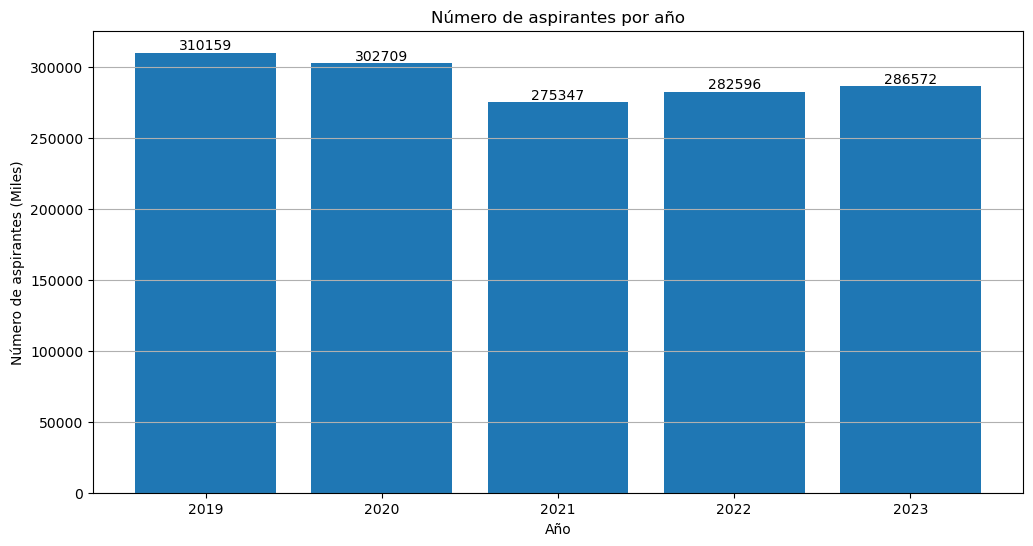

In [74]:
plt.figure(figsize=(12,6))
bars = plt.bar(datos_agrupados["Año"], datos_agrupados["Número de aspirantes (Miles)"])
plt.xlabel("Año")
plt.ylabel("Número de aspirantes (Miles)")
plt.title("Número de aspirantes por año")
plt.xticks(datos_agrupados["Año"])
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

plt.show()

### Concursantes que no cumplieron algún requisito por año

In [75]:
# EXPL_ASI: EXPLICACIÓN DESPUÉS DE HABER CORRIDO EL PROCESO DE ASIGNACIÓN EN EL CENEVAL

# <31	Menor a 31 aciertos
# ASI	Obtuvo un lugar en el proceso de asignación
# CDO	Con Derecho a otra Opción
# NP	No presentó examen
# SC	Sin certificado
# BI	Baja por infracción


datos_agrupados = pd.DataFrame(
    [
        (
            año,
            len(datos), 
            (datos['EXPL_ASI'] == 'NP').sum(),
            ((datos['EXPL_ASI'] == 'NP').mean() * 100).round(2),
            (datos['EXPL_ASI'] == 'BI').sum(), 
            ((datos['EXPL_ASI'] == 'BI').mean() * 100).round(2)
        )
        for año, datos in sus1923
    ],
    columns=["Año", "Total", "No presentó", "%NP", "Baja por infracción", "%BI"]
)

datos_agrupados.to_csv("Tablas/1.2 NoCumplieronRequisito",index=False)

datos_agrupados

,Año,Total,No presentó,%NP,Baja por infracción,%BI
0,2019,310159,9559,3.08,7,0.00
1,2020,302709,16433,5.43,5,0.00
2,2021,275347,8767,3.18,14,0.01
3,2022,282596,8116,2.87,9,0.00
4,2023,286572,8594,3.00,9,0.00


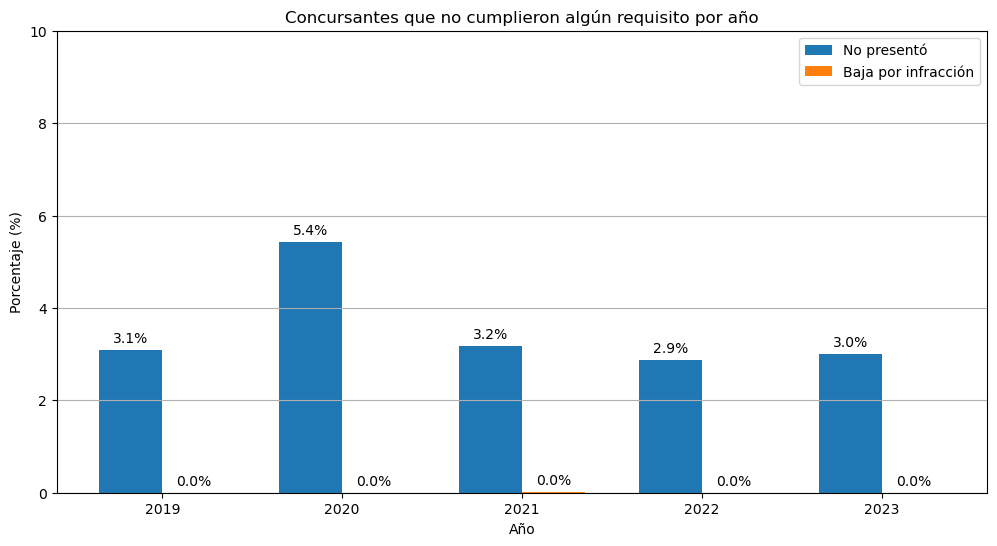

In [76]:
x = np.arange(len(datos_agrupados["Año"])) 
width = 0.35 


plt.figure(figsize=(12,6))


plt.bar(x - width/2, datos_agrupados["%NP"], width, label="No presentó", color='tab:blue')
plt.bar(x + width/2, datos_agrupados["%BI"], width, label="Baja por infracción", color='tab:orange')


plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Concursantes que no cumplieron algún requisito por año")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 10)
plt.legend()
plt.grid(axis='y')

for i in range(len(x)):
    plt.text(x[i] - width/2, datos_agrupados["%NP"][i] + 0.1, f'{datos_agrupados["%NP"][i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width/2, datos_agrupados["%BI"][i] + 0.1, f'{datos_agrupados["%BI"][i]:.1f}%', ha='center', va='bottom')

plt.show()

### Concursantes que cumplieron todos los requisitos por año

In [77]:
# EXPL_ASI: EXPLICACIÓN DESPUÉS DE HABER CORRIDO EL PROCESO DE ASIGNACIÓN EN EL CENEVAL

# <31	Menor a 31 aciertos
# ASI	Obtuvo un lugar en el proceso de asignación
# CDO	Con Derecho a otra Opción
# NP	No presentó examen
# SC	Sin certificado
# BI	Baja por infracción


datos_agrupados = pd.DataFrame(
    [
        (
            año,
            len(datos), 
            (datos['EXPL_ASI'] == 'ASI').sum(),
            round((datos['EXPL_ASI'] == 'ASI').sum() /
                  ((datos['EXPL_ASI'] == 'ASI').sum() + (datos['EXPL_ASI'] == 'CDO').sum()) * 100, 2),
            (datos['EXPL_ASI'] == 'CDO').sum(),
            
            round((datos['EXPL_ASI'] == 'CDO').sum() /
                  ((datos['EXPL_ASI'] == 'ASI').sum() + (datos['EXPL_ASI'] == 'CDO').sum()) * 100, 2)
        )
        for año, datos in sus1923
    ],
    columns=["Año", "Total", "Obtuvo un lugar", "%ASI", "Derecho a otra opción", "%CDO"]
)

datos_agrupados.to_csv("Tablas/1.3 CumplieronRequisitos",index=False)

datos_agrupados


,Año,Total,Obtuvo un lugar,%ASI,Derecho a otra opción,%CDO
0,2019,310159,256816,87.55,36507,12.45
1,2020,302709,255218,89.15,31053,10.85
2,2021,275347,239685,89.92,26881,10.08
3,2022,282596,243991,88.90,30480,11.10
4,2023,286572,245621,88.72,31232,11.28


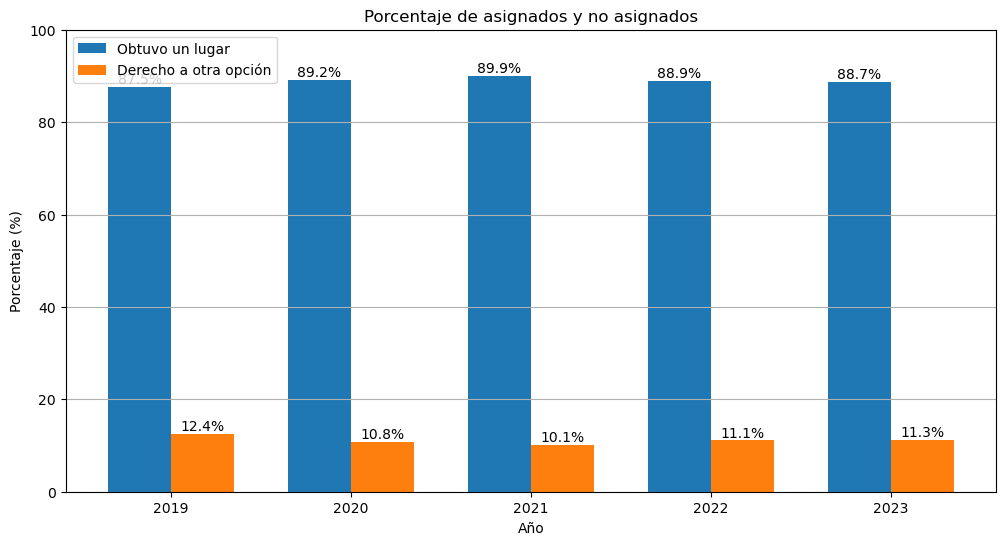

In [78]:
x = np.arange(len(datos_agrupados["Año"])) 
width = 0.35 


plt.figure(figsize=(12,6))


plt.bar(x - width/2, datos_agrupados["%ASI"], width, label="Obtuvo un lugar", color='tab:blue')
plt.bar(x + width/2, datos_agrupados["%CDO"], width, label="Derecho a otra opción", color='tab:orange')


plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Porcentaje de asignados y no asignados")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y')

for i in range(len(x)):
    plt.text(x[i] - width/2, datos_agrupados["%ASI"][i] + 0.1, f'{datos_agrupados["%ASI"][i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width/2, datos_agrupados["%CDO"][i] + 0.1, f'{datos_agrupados["%CDO"][i]:.1f}%', ha='center', va='bottom')

plt.show()

### Concursantes que obtuvieron un lugar por año

In [79]:
# NOPC_ASI: Número de opción asignada
# Del 1 al 20

# NOPC_FIN: Número de opción asignada después de CDO
# Del 1 al 20


print('Valor esperado en 2021: 75,846')
print((sus21['NOPC_ASI'] == 1).sum())
print((sus21['NOPC_FIN'] == 1).sum()) # Más cercano

Valor esperado en 2021: 75,846
76070
75905


In [80]:
datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos),
            primera := (datos["NOPC_FIN"] == 1).sum(),
            round(primera / total * 100, 2),
            primeras5 := (datos["NOPC_FIN"].between(1, 5)).sum(),
            round(primeras5 / total * 100, 2),
            posteriores := (datos["NOPC_FIN"].between(6, 20)).sum(),
            round(posteriores / total * 100, 2)
        )
        for año, datos in sus1923
    ],
    columns=[
        "Año", 
        "Total", 
        "Primera opción", "%Primera", 
        "Primeras 5 opciones", "%Primeras 5", 
        "Opciones posteriores", "%Posteriores"
    ]
)

datos_agrupados.to_csv("Tablas/1.4 ObtuvieronLugar",index=False)

datos_agrupados

,Año,Total,Primera opción,%Primera,Primeras 5 opciones,%Primeras 5,Opciones posteriores,%Posteriores
0,2019,310159,69735,22.48,178942,57.69,78750,25.39
1,2020,302709,72470,23.94,180969,59.78,74260,24.53
2,2021,275347,75905,27.57,176123,63.96,63622,23.11
3,2022,282596,75923,26.87,179718,63.60,64317,22.76
4,2023,286572,72888,25.43,178832,62.40,66996,23.38


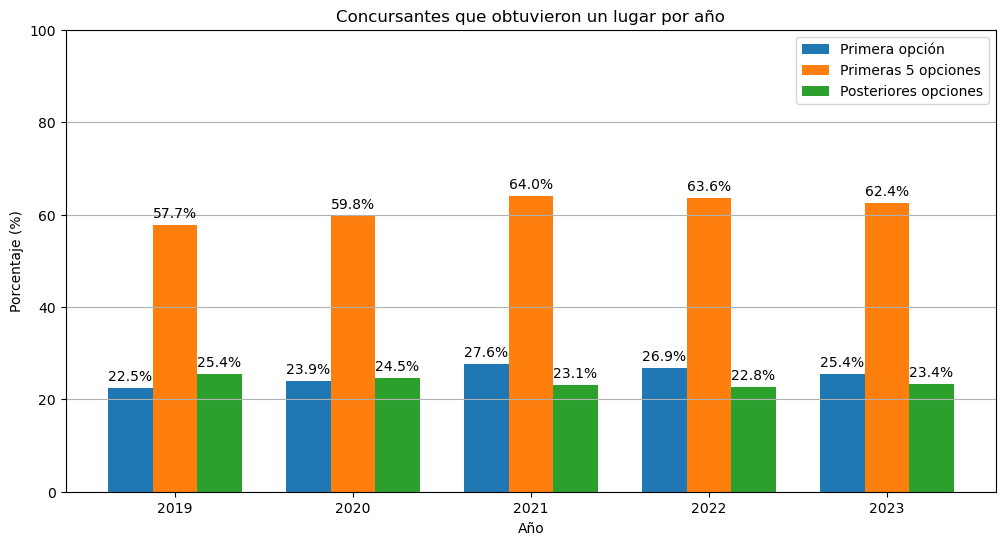

In [81]:
x = np.arange(len(datos_agrupados["Año"])) 
width = 0.25 

plt.figure(figsize=(12,6))


plt.bar(x - width, datos_agrupados["%Primera"], width, label="Primera opción", color='tab:blue')
plt.bar(x, datos_agrupados["%Primeras 5"], width, label="Primeras 5 opciones", color='tab:orange')
plt.bar(x + width, datos_agrupados["%Posteriores"], width, label="Posteriores opciones", color='tab:green')

plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Concursantes que obtuvieron un lugar por año")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y')

for i in range(len(x)):
    plt.text(x[i] - width, datos_agrupados["%Primera"][i] + 1, f'{datos_agrupados["%Primera"][i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i], datos_agrupados["%Primeras 5"][i] + 1, f'{datos_agrupados["%Primeras 5"][i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width, datos_agrupados["%Posteriores"][i] + 1, f'{datos_agrupados["%Posteriores"][i]:.1f}%', ha='center', va='bottom')

plt.show()

#### Concursantes que obtuvieron un lugar por año (Colbach)

In [82]:
def resumen_asignados(asignados, total):
    return pd.DataFrame(
        [
            (
                año,
                total_ := len(total_df),
                asign_ := len(asignados_df),
                round(asign_/total_*100, 2)
            )
            for año, total_df in total.groupby("AÑO")
            for asignados_df in [asignados[asignados["AÑO"]==año]]
        ],
        columns=["Año", "Total_presentaron", "Asignados", "%Asignados"]
    )


datos_agrupados_colbach = resumen_asignados(colbach, pd.concat([df.assign(AÑO=año) for año, df in pres1923], ignore_index=True))

datos_agrupados_colbach.to_csv("Tablas/1.4.1 ObtuvieronLugarCol",index=False)

datos_agrupados_colbach


,Año,Total_presentaron,Asignados,%Asignados
0,2019,300600,41038,13.65
1,2020,286276,41239,14.41
2,2021,266568,41549,15.59
3,2022,274477,41726,15.20
4,2023,277978,41695,15.00


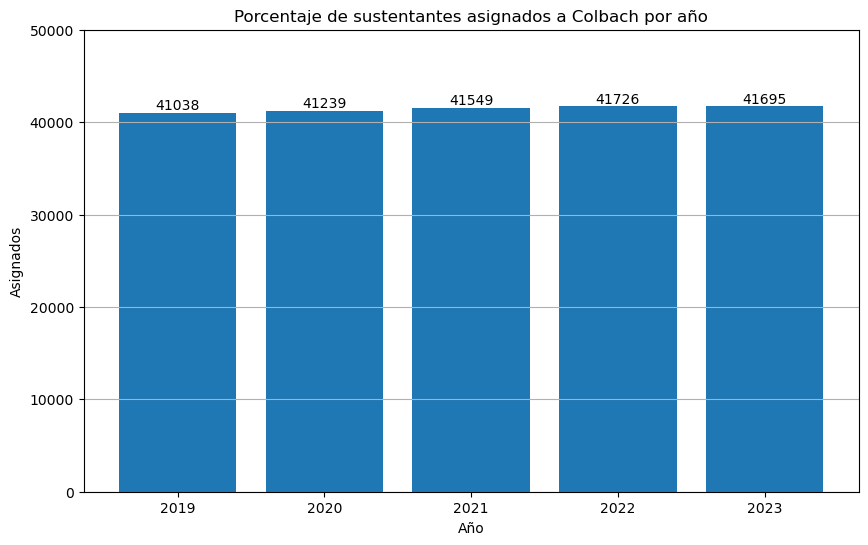

In [83]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
    datos_agrupados_colbach["Año"].astype(str),
    datos_agrupados_colbach["Asignados"]
)
plt.title("Porcentaje de sustentantes asignados a Colbach por año")
plt.xlabel("Año")
plt.ylabel("Asignados")
plt.ylim(0, 50000)
plt.grid(axis='y')

for bar, pct in zip(bars, datos_agrupados_colbach["Asignados"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{pct}", ha='center', va='bottom')

plt.show()


#### Concursantes que obtuvieron un lugar por año (Colbach8)

In [84]:
datos_agrupados_colbach8 = resumen_asignados(colbach8, pd.concat([df.assign(AÑO=año) for año, df in pres1923], ignore_index=True))

datos_agrupados_colbach8.to_csv("Tablas/1.4.2 ObtuvieronLugarCol8",index=False)
datos_agrupados_colbach8


,Año,Total_presentaron,Asignados,%Asignados
0,2019,300600,1346,0.45
1,2020,286276,1136,0.40
2,2021,266568,1196,0.45
3,2022,274477,1154,0.42
4,2023,277978,1163,0.42


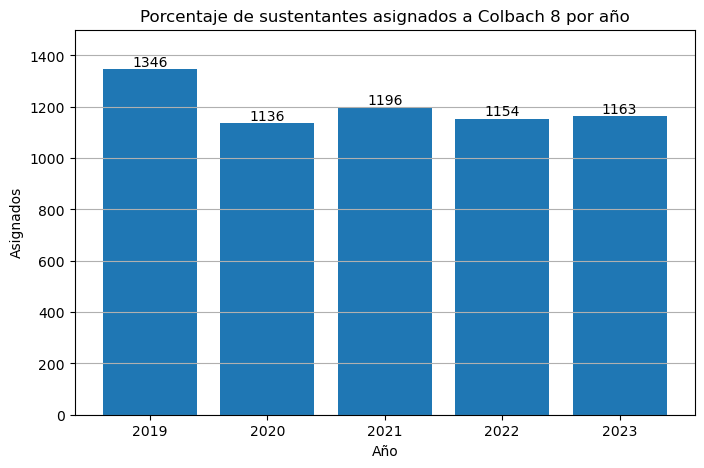

In [85]:
plt.figure(figsize=(8, 5))
bars = plt.bar(
    datos_agrupados_colbach8["Año"].astype(str),
    datos_agrupados_colbach8["Asignados"]
)
plt.title("Porcentaje de sustentantes asignados a Colbach 8 por año")
plt.xlabel("Año")
plt.ylabel("Asignados")
plt.ylim(0, 1500)
plt.grid(axis='y')

for bar, pct in zip(bars, datos_agrupados_colbach8["Asignados"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{pct}", ha='center', va='bottom')

plt.show()


### Concursantes que obtuvieron un lugar según la escuela de procedencia por año

In [86]:
# REGI_SEC: Régimen de la secundaria de origen
# PUB
# PRI

datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos), 
            pub := (datos['REG_PROC'] == 1).sum(),
            round(pub/total * 100, 2),

            priv := (datos['REG_PROC'] == 2).sum(),
            round(priv/total * 100, 2)
        )
        for año, datos in enc1923
    ],
    columns=["Año", "Total", "Escuela Pública", "%PUB", "Escuela Privada", "%PRIV"]
)

datos_agrupados.to_csv("Tablas/1.5 EscuelaProcedencia",index=False)

datos_agrupados

,Año,Total,Escuela Pública,%PUB,Escuela Privada,%PRIV
0,2019,310159,284531,91.74,25628,8.26
1,2020,302709,278643,92.05,24066,7.95
2,2021,275347,252271,91.62,23076,8.38
3,2022,282596,259909,91.97,22687,8.03
4,2023,286572,264213,92.20,22359,7.80


In [87]:
# NOTA: En las bases del 2019, 2020 y 2023 estos datos están vacios 
enc19['REG_PROC']

0         2
1         1
2         1
3         1
4         1
         ..
310154    1
310155    1
310156    1
310157    1
310158    1
Name: REG_PROC, Length: 310159, dtype: int64

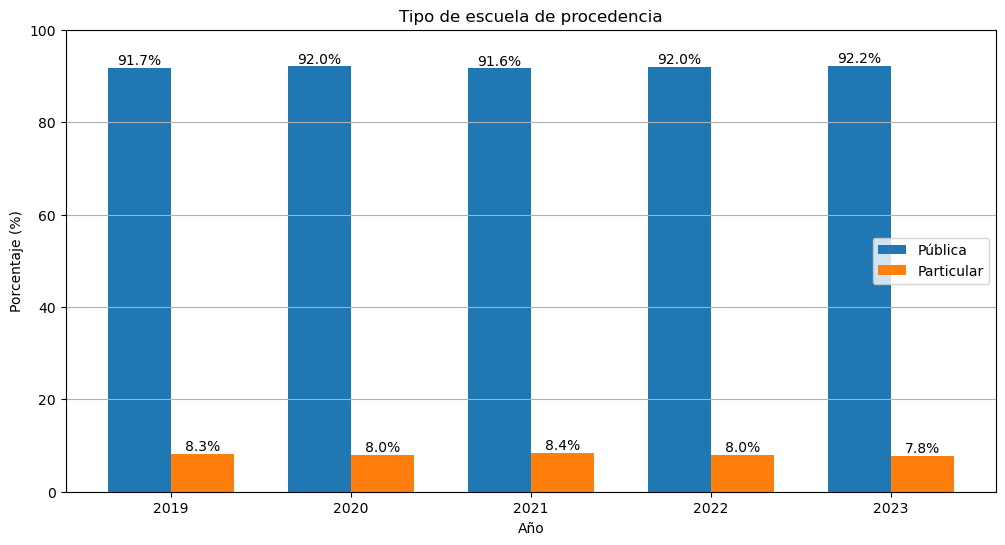

In [88]:
x = np.arange(len(datos_agrupados["Año"])) 
width = 0.35 


plt.figure(figsize=(12,6))


plt.bar(x - width/2, datos_agrupados["%PUB"], width, label="Pública", color='tab:blue')
plt.bar(x + width/2, datos_agrupados["%PRIV"], width, label="Particular", color='tab:orange')


plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Tipo de escuela de procedencia")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y')

for i in range(len(x)):
    plt.text(x[i] - width/2, datos_agrupados["%PUB"][i] + 0.1, f'{datos_agrupados["%PUB"][i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width/2, datos_agrupados["%PRIV"][i] + 0.1, f'{datos_agrupados["%PRIV"][i]:.1f}%', ha='center', va='bottom')

plt.show()

#### Concursantes que obtuvieron un lugar según la escuela de procedencia por año (Colbach)

In [89]:
encuestas = pd.concat(
    [df.assign(AÑO=año) for año, df in enc1923],
    ignore_index=True
)
colbach_enc = pd.merge(
    colbach,
    encuestas,
    on=["FOLIO", "AÑO"],  
    how="inner"           
)


In [90]:
datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos),
            pub := (datos['REG_PROC'] == 1).sum(),
            round(pub/total * 100, 2),

            priv := (datos['REG_PROC'] == 2).sum(),
            round(priv/total * 100, 2)
        )
        for año, datos in colbach_enc.groupby("AÑO")
    ],
    columns=["Año", "Total", "Escuela Pública", "%PUB", "Escuela Privada", "%PRIV"],
)

datos_agrupados.to_csv("Tablas/1.5.1 EscuelaProcedenciaCol",index=False)

datos_agrupados

,Año,Total,Escuela Pública,%PUB,Escuela Privada,%PRIV
0,2019,41038,38738,94.40,2300,5.60
1,2020,41239,39203,95.06,2036,4.94
2,2021,41549,39343,94.69,2206,5.31
3,2022,41726,38274,91.73,3452,8.27
4,2023,41695,38394,92.08,3301,7.92


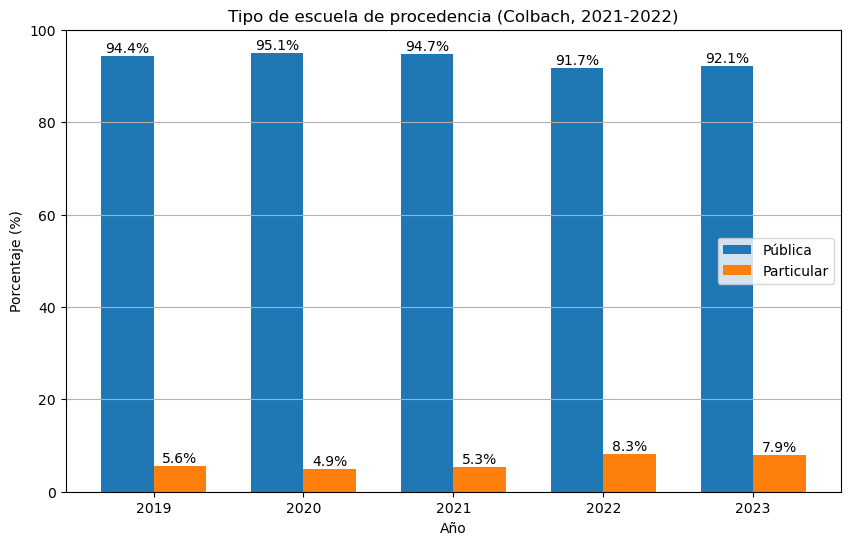

In [91]:
x = np.arange(len(datos_agrupados["Año"]))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(
    x - width / 2,
    datos_agrupados["%PUB"],
    width,
    label="Pública",
    color="tab:blue",
)
plt.bar(
    x + width / 2,
    datos_agrupados["%PRIV"],
    width,
    label="Particular",
    color="tab:orange",
)

plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Tipo de escuela de procedencia (Colbach, 2021-2022)")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis="y")


for i in range(len(x)):
    plt.text(
        x[i] - width / 2,
        datos_agrupados["%PUB"][i] + 0.1,
        f'{datos_agrupados["%PUB"][i]:.1f}%',
        ha="center",
        va="bottom",
    )
    plt.text(
        x[i] + width / 2,
        datos_agrupados["%PRIV"][i] + 0.1,
        f'{datos_agrupados["%PRIV"][i]:.1f}%',
        ha="center",
        va="bottom",
    )

plt.show()

#### Concursantes que obtuvieron un lugar según la escuela de procedencia por año (Colbach 8)

In [92]:
encuestas = pd.concat(
    [df.assign(AÑO=año) for año, df in enc1923],
    ignore_index=True
)
colbach8_enc = pd.merge(
    colbach8,
    encuestas,
    on=["FOLIO", "AÑO"],  
    how="inner"           
)


In [93]:
colbach8_2122 = colbach8[colbach8["AÑO"].isin([2021, 2022])]

datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos),
            pub := (datos['REG_PROC'] == 1).sum(),
            round(pub/total * 100, 2),

            priv := (datos['REG_PROC'] == 2).sum(),
            round(priv/total * 100, 2)
        )
        for año, datos in colbach8_enc.groupby("AÑO")
    ],
    columns=["Año", "Total", "Escuela Pública", "%PUB", "Escuela Privada", "%PRIV"],
)

datos_agrupados.to_csv("Tablas/1.5.2 EscuelaProcedenciaCol8",index=False)

datos_agrupados


,Año,Total,Escuela Pública,%PUB,Escuela Privada,%PRIV
0,2019,1346,1255,93.24,91,6.76
1,2020,1136,1087,95.69,49,4.31
2,2021,1196,1126,94.15,70,5.85
3,2022,1154,1023,88.65,131,11.35
4,2023,1163,1062,91.32,101,8.68


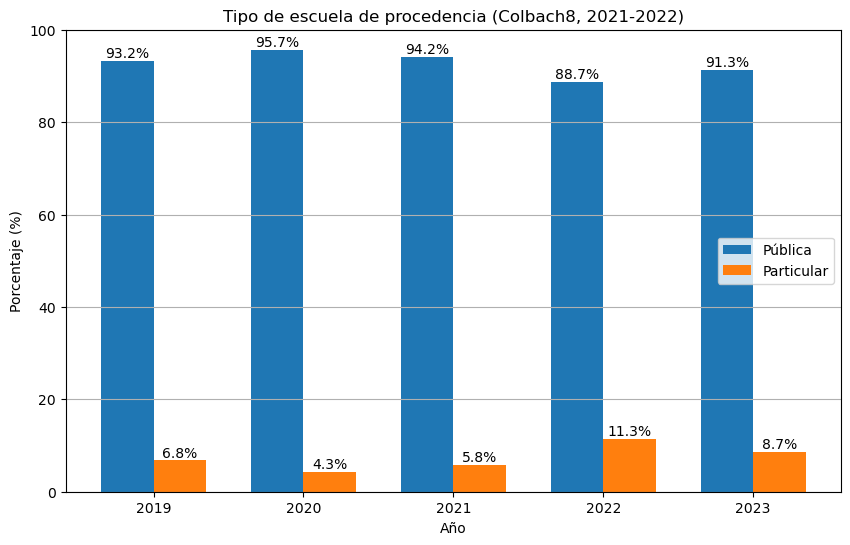

In [94]:
x = np.arange(len(datos_agrupados["Año"]))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(
    x - width / 2,
    datos_agrupados["%PUB"],
    width,
    label="Pública",
    color="tab:blue",
)
plt.bar(
    x + width / 2,
    datos_agrupados["%PRIV"],
    width,
    label="Particular",
    color="tab:orange",
)

plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Tipo de escuela de procedencia (Colbach8, 2021-2022)")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis="y")


for i in range(len(x)):
    plt.text(
        x[i] - width / 2,
        datos_agrupados["%PUB"][i] + 0.1,
        f'{datos_agrupados["%PUB"][i]:.1f}%',
        ha="center",
        va="bottom",
    )
    plt.text(
        x[i] + width / 2,
        datos_agrupados["%PRIV"][i] + 0.1,
        f'{datos_agrupados["%PRIV"][i]:.1f}%',
        ha="center",
        va="bottom",
    )

plt.show()

### Concursantes divididos por sexo por año

In [95]:
# SUS_SEXO: SEXO DEL SUSTENTANTE
# H
# M
# 2023: SEXO

datos_agrupados = pd.DataFrame(
    [
        (
            
            año,
            total := len(datos), 
            hombre := (datos['SUS_SEXO'] == 'H').sum(),
            round(hombre/total * 100, 2),

            mujer := (datos['SUS_SEXO'] == 'M').sum(),
            round(mujer/total * 100, 2)
        )
        for año, datos in sus1923
    ],
    columns=["Año", "Total", "Hombre", "%H", "Mujer", "%M"]
)

datos_agrupados.to_csv("Tablas/1.6 DistribucionSexo",index=False)

datos_agrupados

,Año,Total,Hombre,%H,Mujer,%M
0,2019,310159,155240,50.05,154919,49.95
1,2020,302709,150829,49.83,151880,50.17
2,2021,275347,133851,48.61,141496,51.39
3,2022,282596,140421,49.69,142175,50.31
4,2023,286572,142354,49.67,144218,50.33


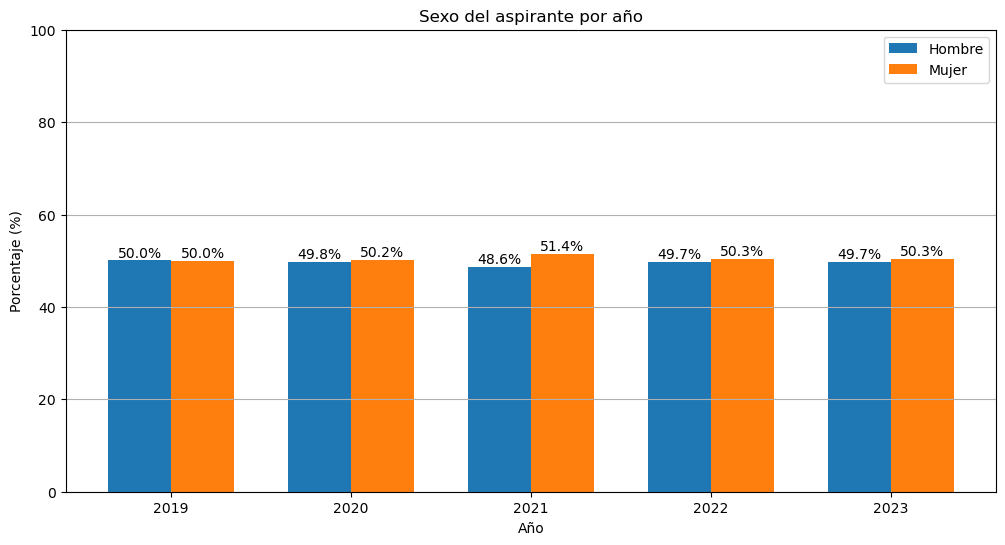

In [96]:
x = np.arange(len(datos_agrupados["Año"])) 
width = 0.35 


plt.figure(figsize=(12,6))


plt.bar(x - width/2, datos_agrupados["%H"], width, label="Hombre", color='tab:blue')
plt.bar(x + width/2, datos_agrupados["%M"], width, label="Mujer", color='tab:orange')


plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Sexo del aspirante por año")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y')

for i in range(len(x)):
    plt.text(x[i] - width/2, datos_agrupados["%H"][i] + 0.1, f'{datos_agrupados["%H"][i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width/2, datos_agrupados["%M"][i] + 0.1, f'{datos_agrupados["%M"][i]:.1f}%', ha='center', va='bottom')

plt.show()

#### Concursantes divididos por sexo por año (Colbach)

In [97]:
colbach = colbach.loc[:, ~colbach.columns.duplicated()]

datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos),
            hombre := (datos['SUS_SEXO'] == 'H').sum(),
            round(hombre / total * 100, 2),
            mujer := (datos['SUS_SEXO'] == 'M').sum(),
            round(mujer / total * 100, 2)
        )
        for año, datos in colbach.groupby("AÑO")
    ],
    columns=["Año", "Total", "Hombre", "%H", "Mujer", "%M"]
)
datos_agrupados.to_csv("Tablas/1.6.1 DistribucionSexoCol",index=False)
datos_agrupados


,Año,Total,Hombre,%H,Mujer,%M
0,2019,41038,20439,49.81,20599,50.19
1,2020,41239,20205,48.99,21034,51.01
2,2021,41549,19663,47.32,21886,52.68
3,2022,41726,20356,48.78,21370,51.22
4,2023,41695,19979,47.92,21716,52.08


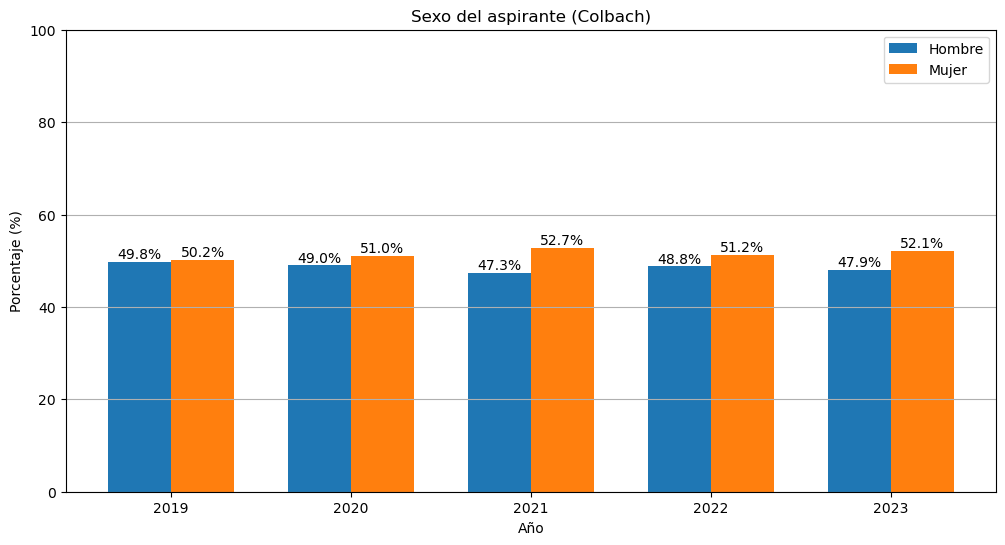

In [98]:
x = np.arange(len(datos_agrupados["Año"]))
width = 0.35

plt.figure(figsize=(12, 6))

plt.bar(x - width / 2, datos_agrupados["%H"], width, label="Hombre", color="tab:blue")
plt.bar(x + width / 2, datos_agrupados["%M"], width, label="Mujer", color="tab:orange")

plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Sexo del aspirante (Colbach)")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis="y")

for i in range(len(x)):
    plt.text(
        x[i] - width / 2,
        datos_agrupados["%H"][i] + 0.1,
        f'{datos_agrupados["%H"][i]:.1f}%',
        ha="center",
        va="bottom",
    )
    plt.text(
        x[i] + width / 2,
        datos_agrupados["%M"][i] + 0.1,
        f'{datos_agrupados["%M"][i]:.1f}%',
        ha="center",
        va="bottom",
    )

plt.show()

#### Concursantes divididos por sexo por año (Colbach 8)

In [99]:
colbach8 = colbach8.loc[:, ~colbach8.columns.duplicated()]

datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos),
            hombre := (datos['SUS_SEXO'] == 'H').sum(),
            round(hombre / total * 100, 2),
            mujer := (datos['SUS_SEXO'] == 'M').sum(),
            round(mujer / total * 100, 2)
        )
        for año, datos in colbach8.groupby("AÑO")
    ],
    columns=["Año", "Total", "Hombre", "%H", "Mujer", "%M"]
)
datos_agrupados.to_csv("Tablas/1.6.2 DistribucionSexoCol8",index=False)
datos_agrupados


,Año,Total,Hombre,%H,Mujer,%M
0,2019,1346,685,50.89,661,49.11
1,2020,1136,581,51.14,555,48.86
2,2021,1196,584,48.83,612,51.17
3,2022,1154,578,50.09,576,49.91
4,2023,1163,564,48.50,599,51.50


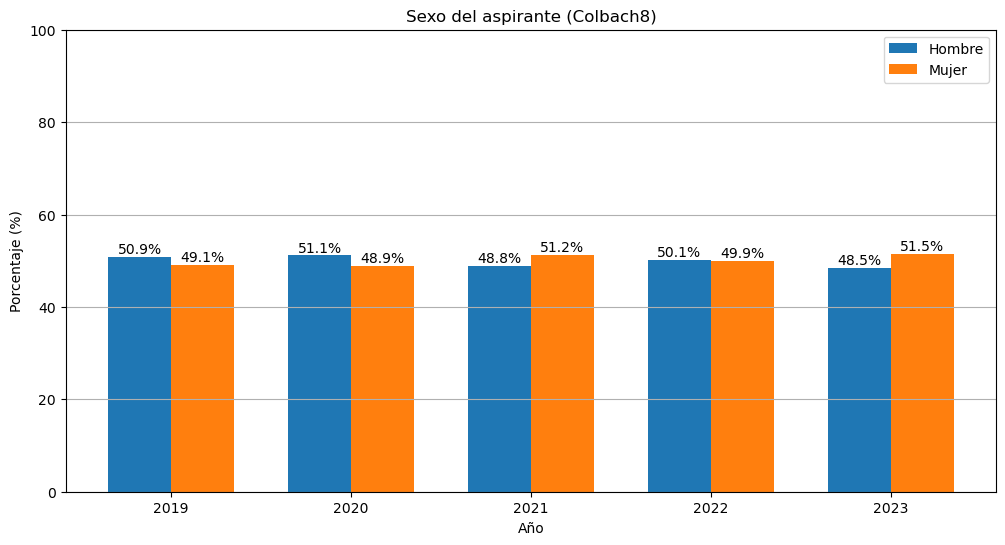

In [100]:
x = np.arange(len(datos_agrupados["Año"]))
width = 0.35

plt.figure(figsize=(12, 6))

plt.bar(x - width / 2, datos_agrupados["%H"], width, label="Hombre", color="tab:blue")
plt.bar(x + width / 2, datos_agrupados["%M"], width, label="Mujer", color="tab:orange")

plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.title("Sexo del aspirante (Colbach8)")
plt.xticks(x, datos_agrupados["Año"])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis="y")

for i in range(len(x)):
    plt.text(
        x[i] - width / 2,
        datos_agrupados["%H"][i] + 0.1,
        f'{datos_agrupados["%H"][i]:.1f}%',
        ha="center",
        va="bottom",
    )
    plt.text(
        x[i] + width / 2,
        datos_agrupados["%M"][i] + 0.1,
        f'{datos_agrupados["%M"][i]:.1f}%',
        ha="center",
        va="bottom",
    )

plt.show()


### Promedio de aciertos por año

In [101]:
datos_agrupados = pd.DataFrame(
    [
        (
            año,
            total := len(datos),
            round(datos['NGLOBAL'].mean()),
            round(datos['NGLOBAL'].var(), 2),
            round(datos['NGLOBAL'].std(), 2)

        )
        for año, datos in pres1923
    ],
    columns=["Año", "Total", "Promedio de aciertos", "Varianza", "DesvEst"]
)

datos_agrupados.to_csv("Tablas/1.7 Aciertos",index=False)

datos_agrupados

,Año,Total,Promedio de aciertos,Varianza,DesvEst
0,2019,300600,69,483.92,22.00
1,2020,286276,70,477.17,21.84
2,2021,266568,69,475.20,21.80
3,2022,274477,69,471.05,21.70
4,2023,277978,68,488.12,22.09


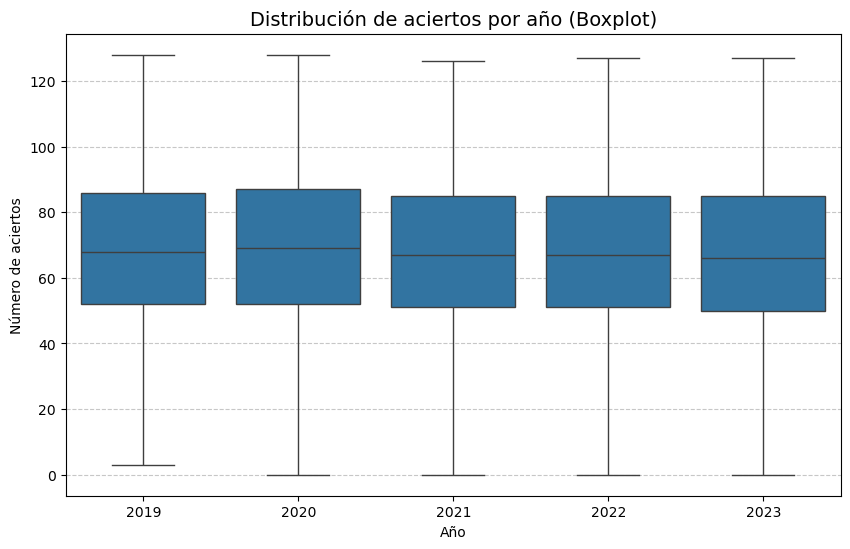

In [102]:
df_todos = pd.concat([df.assign(Año=año) for año, df in pres1923])

plt.figure(figsize=(10, 6))
sns.boxplot(x="Año", y="NGLOBAL", data=df_todos)

plt.title("Distribución de aciertos por año (Boxplot)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Número de aciertos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Promedio de aciertos por año (Colbach) (Pendiente: Agregar varianza violin o bigote)

In [103]:
datos_agrupados = pd.DataFrame(
    [
        (
   
            año,
            total := len(datos), 
            round(datos['NGLOBAL'].mean()),
            round(datos['NGLOBAL'].var(), 2),
            round(datos['NGLOBAL'].std(), 2)

        )
        for año, datos in colbach.groupby("AÑO")
    ],
    columns=["Año", "Total", "Promedio de aciertos", "Varianza", "DesvEst"]
)

datos_agrupados.to_csv("Tablas/1.7.1 AciertosCol",index=False)

datos_agrupados

,Año,Total,Promedio de aciertos,Varianza,DesvEst
0,2019,41038,73,132.39,11.51
1,2020,41239,72,128.96,11.36
2,2021,41549,68,153.75,12.40
3,2022,41726,68,154.13,12.42
4,2023,41695,68,155.25,12.46


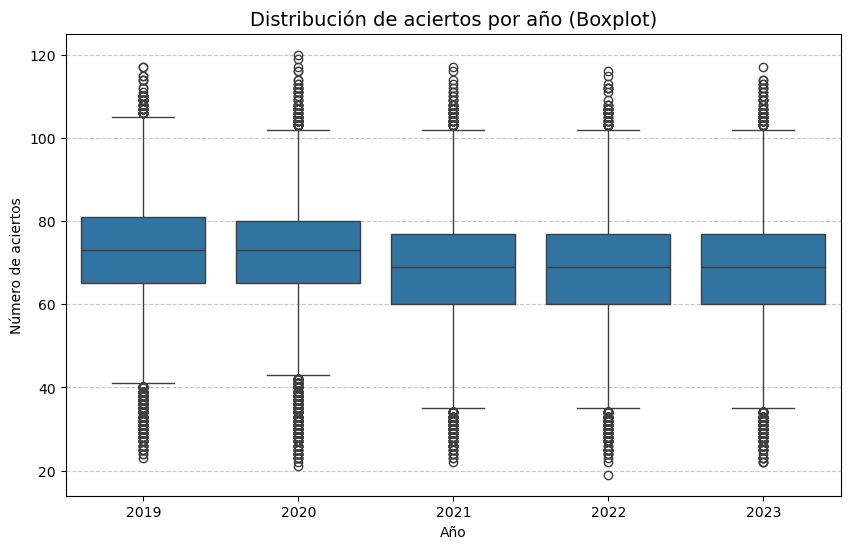

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="AÑO", y="NGLOBAL", data=colbach)

plt.title("Distribución de aciertos por año (Boxplot)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Número de aciertos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Promedio de aciertos por año (Colbach 8)

In [105]:
datos_agrupados = pd.DataFrame(
    [
        (
   
            año,
            total := len(datos), 
            round(datos['NGLOBAL'].mean()),
            round(datos['NGLOBAL'].var(), 2),
            round(datos['NGLOBAL'].std(), 2)

        )
        for año, datos in colbach8.groupby("AÑO")
    ],
    columns=["Año", "Total", "Promedio de aciertos", "Varianza", "DesvEst"]
)

datos_agrupados.to_csv("Tablas/1.7.2 AciertosCol8",index=False)

datos_agrupados

,Año,Total,Promedio de aciertos,Varianza,DesvEst
0,2019,1346,73,65.83,8.11
1,2020,1136,75,49.00,7.00
2,2021,1196,72,65.24,8.08
3,2022,1154,72,60.34,7.77
4,2023,1163,72,56.71,7.53


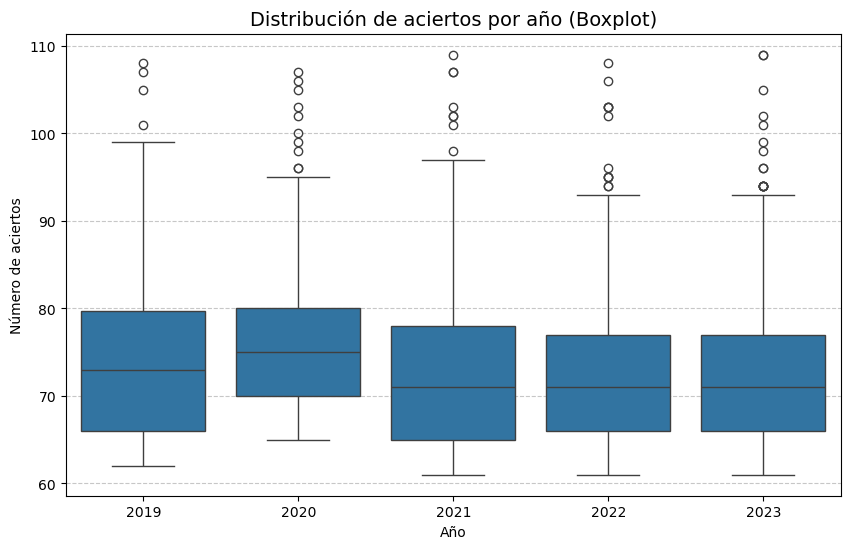

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="AÑO", y="NGLOBAL", data=colbach8)

plt.title("Distribución de aciertos por año (Boxplot)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Número de aciertos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Número de opciones por institución

In [107]:
opc1923 = [
    (2019, opc19),
    (2020, opc20),
    (2021, opc21),
    (2022, opc22),
    (2023, opc23)
]

In [108]:
# Diccionario de claves

clvinst ={
'B0':	'Bachilleres',
'C1':	'CONALEP',
'G2':	'Dirección General del Bachillerato',
'A3':	'UEMSTAyCM CBTA',
'D4':	'UEMSTIS',
'I5':	'IPN',
'U6':	'UNAM',
'S0':	'SE - COBAEM',
'S1':	'SE - CONALEP ESTADO DE MÉXICO',
'S2':	'SE - TELEBACHILLERATO',
'S4':	'SE - CBT',
'S5':	'SE - CECYTEM',
'S7':	'SE - P.O.',
'S8':	'SE - P.O.',
'M9':	'UAEM',
'T3':	'UEMSTAyCM CMM'
}

In [109]:
dict_opc = dict(opc1923)

resumen = []

for year, df in dict_opc.items():
    conteo = df['CVE_INST'].value_counts() # Clave de la institución

    for clave, cantidad in conteo.items():
        nombre = clvinst.get(clave, "Desconocido")  
        resumen.append({
            "Año": year,
            "Clave": clave,
            "Nombre": nombre,
            "Numero de opciones educativas": cantidad
        })

datos_agrupados = pd.DataFrame(resumen)
datos_agrupados = datos_agrupados.sort_values(["Año", "Clave"]).reset_index(drop=True)

datos_agrupados = datos_agrupados.pivot_table(
    index=["Clave", "Nombre"],             
    columns="Año",                          
    values="Numero de opciones educativas", 
    fill_value=0                           
).reset_index()

datos_agrupados.to_csv("Tablas/1.8 OpcionesEducativas",index=False)

datos_agrupados

Año,Clave,Nombre,2019,2020,2021,2022,2023
0,A3,UEMSTAyCM CBTA,6.0,6.0,6.0,6.0,6.0
1,B0,Bachilleres,20.0,20.0,20.0,20.0,20.0
2,C1,CONALEP,89.0,89.0,89.0,89.0,89.0
3,D4,UEMSTIS,51.0,51.0,51.0,51.0,51.0
4,G2,Dirección General del Bachillerato,2.0,2.0,2.0,2.0,2.0
5,I5,IPN,16.0,16.0,17.0,17.0,17.0
6,M9,UAEM,1.0,1.0,1.0,1.0,1.0
7,S0,SE - COBAEM,20.0,20.0,20.0,20.0,20.0
8,S1,SE - CONALEP ESTADO DE MÉXICO,100.0,100.0,101.0,101.0,101.0
9,S2,SE - TELEBACHILLERATO,42.0,46.0,46.0,46.0,46.0


### Tabla 1.1 Distribución de concursantes con base en su primera preferencia

In [110]:
# OPC_ED01 contiene la primera opción escogida por el alumno
dict_sus = dict(sus1923)

resumen_sus = []

for year, df in dict_sus.items():
    # Extraer los dos primeros caracteres de la clave
    claves_cortas = df['OPC_ED01'].astype(str).str[:2]
    
    conteo = claves_cortas.value_counts()
    
    for clave, cantidad in conteo.items():
        nombre = clvinst.get(clave, "Desconocido")
        resumen_sus.append({
            "Año": year,
            "Clave": clave,
            "Nombre": nombre,
            "Numero de instituciones": cantidad
        })

datos_agrupados = pd.DataFrame(resumen_sus)

tabla_conteos = datos_agrupados.pivot_table(
    index=["Clave", "Nombre"],
    columns="Año",
    values="Numero de instituciones",
    fill_value=0
)

tabla_porcentajes = (tabla_conteos.div(tabla_conteos.sum(axis=0), axis=1) * 100).round(2)
tabla_porcentajes = tabla_porcentajes.add_suffix("_%")
datos_agrupados = pd.concat([tabla_conteos, tabla_porcentajes], axis=1).reset_index()

datos_agrupados.to_csv("Tablas/1.9 PrimeraPreferencia",index=False)

datos_agrupados


Año,Clave,Nombre,2019,2020,2021,2022,2023,2019_%,2020_%,2021_%,2022_%,2023_%
0,A3,UEMSTAyCM CBTA,636.0,558.0,443.0,437.0,499.0,0.21,0.18,0.16,0.15,0.17
1,B0,Bachilleres,8477.0,8298.0,7084.0,6805.0,7185.0,2.73,2.74,2.57,2.41,2.51
2,C1,CONALEP,6088.0,6104.0,5248.0,5267.0,5049.0,1.96,2.02,1.91,1.86,1.76
3,D4,UEMSTIS,14553.0,14527.0,12776.0,12706.0,12309.0,4.69,4.80,4.64,4.50,4.30
4,G2,Dirección General del Bachillerato,630.0,604.0,492.0,433.0,402.0,0.20,0.20,0.18,0.15,0.14
5,I5,IPN,42121.0,43575.0,38646.0,36022.0,33731.0,13.58,14.40,14.04,12.75,11.77
6,M9,UAEM,1154.0,1156.0,1209.0,1153.0,1172.0,0.37,0.38,0.44,0.41,0.41
7,S0,SE - COBAEM,3610.0,3684.0,3222.0,3737.0,3785.0,1.16,1.22,1.17,1.32,1.32
8,S1,SE - CONALEP ESTADO DE MÉXICO,8521.0,9069.0,7683.0,8449.0,8544.0,2.75,3.00,2.79,2.99,2.98
9,S2,SE - TELEBACHILLERATO,474.0,562.0,457.0,434.0,512.0,0.15,0.19,0.17,0.15,0.18


C:\Users\misae\AppData\Local\Temp\ipykernel_16064\1207106150.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", len(tabla_grafica_T.columns))


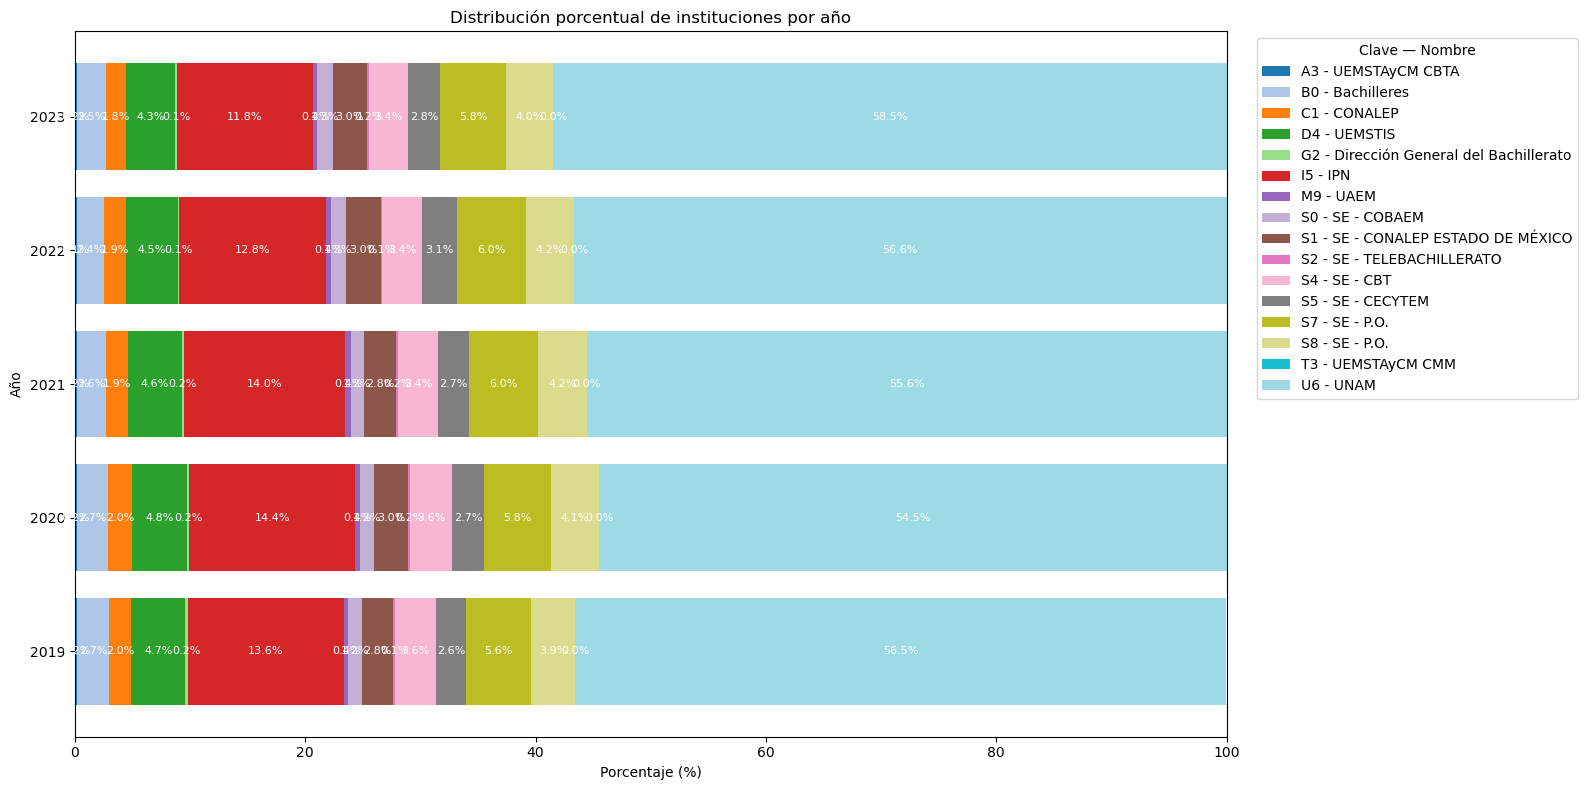

In [111]:
tabla_grafica = tabla_porcentajes.copy()
tabla_grafica.columns = tabla_grafica.columns.str.replace("_%", "", regex=False) 
tabla_grafica_T = tabla_grafica.T.sort_index() 

if hasattr(tabla_grafica_T.columns, "levels") and tabla_grafica_T.columns.nlevels > 1:
    tabla_grafica_T.columns = [f"{cl} - {nom}" for cl, nom in tabla_grafica_T.columns]

fig, ax = plt.subplots(figsize=(16, 8))
left = np.zeros(len(tabla_grafica_T), dtype=float)

colors = cm.get_cmap("tab20", len(tabla_grafica_T.columns))

for i, col in enumerate(tabla_grafica_T.columns):
    vals = tabla_grafica_T[col].to_numpy(dtype=float)
    bars = ax.barh(
        tabla_grafica_T.index.astype(str),
        vals,
        left=left,
        label=str(col),
        color=colors(i) 
    )

    for bar, val in zip(bars, vals):
        if val > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2.0,
                bar.get_y() + bar.get_height() / 2.0,
                f"{val:.1f}%",
                ha="center", va="center", fontsize=8, color="white"
            )

    left += vals

ax.set_xlim(0, 100)
ax.set_title("Distribución porcentual de instituciones por año")
ax.set_xlabel("Porcentaje (%)")
ax.set_ylabel("Año")
ax.legend(title="Clave — Nombre", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


#### Alumnos registrados en Bachilleres (Primera a decima opción)

In [112]:
dict_sus = dict(sus1923)

resumen_sus = []

for year, df in dict_sus.items():
    total_20 = 0
    for i in range(1, 21):
        col = f"OPC_ED{str(i).zfill(2)}"  # OPC_ED01, OPC_ED02, ...
        if col in df.columns:
            # "Empieza con B0"
            total_20 += df[col].astype(str).fillna("").str.startswith("B0").sum()
    
    total_10 = 0
    for i in range(1, 11):
        col = f"OPC_ED{str(i).zfill(2)}"
        if col in df.columns:
            conteo = df[col].astype(str).fillna("").str.startswith("B0").sum()
            total_10 += conteo
            porcentaje = (conteo / total_20 * 100) if total_20 > 0 else 0
            
            resumen_sus.append({
                "Año": year,
                "Opcion": i,
                "Alumnos": conteo,
                "Porcentaje": porcentaje
            })
    
    restantes = total_20 - total_10
    porcentaje_restante = (restantes / total_20 * 100) if total_20 > 0 else 0
    
    resumen_sus.append({
        "Año": year,
        "Opcion": "11 a 20",  
        "Alumnos": restantes,
        "Porcentaje": porcentaje_restante
    })

datos_agrupados = pd.DataFrame(resumen_sus)

tabla_conteos = datos_agrupados.pivot_table(
    index="Opcion",
    columns="Año",
    values="Alumnos", 
    fill_value=0
)

tabla_porcentajes = datos_agrupados.pivot_table(
    index="Opcion",
    columns="Año",
    values="Porcentaje",
    fill_value=0
)

tabla_porcentajes = tabla_porcentajes.add_suffix("_%")
datos_agrupados = pd.concat([tabla_conteos, tabla_porcentajes], axis=1).reset_index()

datos_agrupados.to_csv("Tablas/1.9.1 Opciones1a20Col",index=False)

datos_agrupados


Año,Opcion,2019,2020,2021,2022,2023,2019_%,2020_%,2021_%,2022_%,2023_%
0,1,8477.0,8298.0,7084.0,6805.0,7185.0,2.500066,2.543417,2.558010,2.520912,2.562840
1,2,12161.0,12212.0,10635.0,10157.0,10669.0,3.586564,3.743096,3.840265,3.762660,3.805559
2,3,17804.0,17809.0,15502.0,15424.0,16223.0,5.250818,5.458630,5.597724,5.713820,5.786633
3,4,23496.0,23617.0,20384.0,20388.0,21352.0,6.929522,7.238838,7.360599,7.552734,7.616113
4,5,29405.0,28853.0,25147.0,24840.0,26208.0,8.672225,8.843723,9.080503,9.201977,9.348215
5,6,33023.0,32437.0,27245.0,27347.0,28945.0,9.739258,9.942254,9.838084,10.130695,10.324484
6,7,34190.0,33024.0,27857.0,27627.0,28974.0,10.083434,10.122175,10.059075,10.234421,10.334828
7,8,33280.0,31741.0,26489.0,26189.0,27066.0,9.815053,9.728923,9.565095,9.701714,9.654257
8,9,30746.0,28859.0,24371.0,23827.0,24561.0,9.067717,8.845562,8.800292,8.826711,8.760741
9,10,27303.0,25713.0,21632.0,20881.0,21408.0,8.052296,7.881283,7.811247,7.735365,7.636087


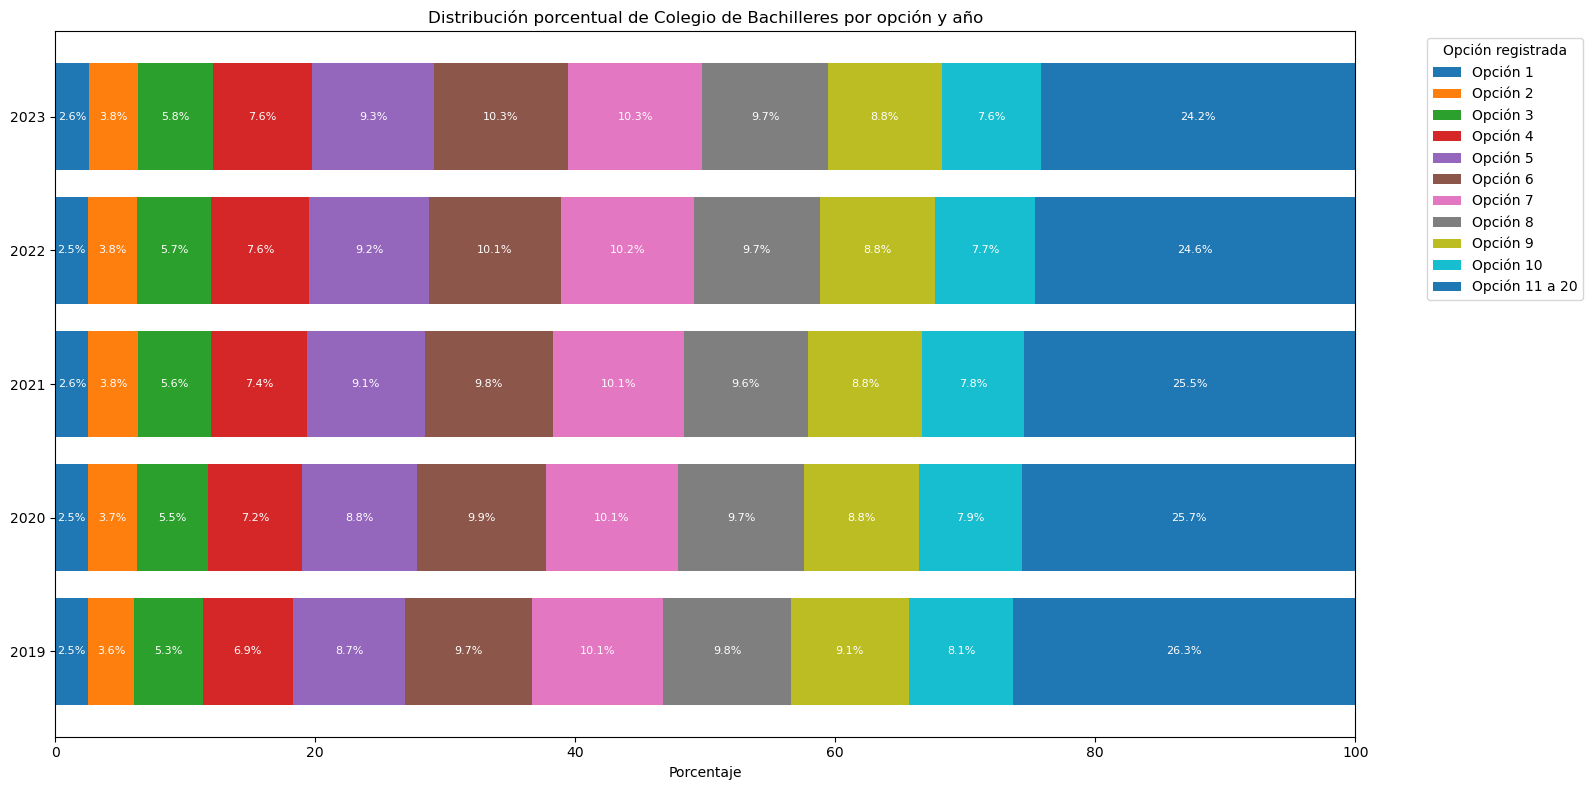

In [113]:
cols = [str(c) for c in datos_agrupados.columns]

datos_agrupados.columns = cols
tabla_grafica = datos_agrupados.set_index("Opcion")[[c for c in cols if c.endswith("_%")]]
tabla_grafica = tabla_grafica.reindex(sorted(tabla_grafica.columns), axis=1)
tabla_grafica_T = tabla_grafica.T
tabla_grafica_T.index = [col.replace("_%", "") for col in tabla_grafica_T.index] 

fig, ax = plt.subplots(figsize=(16, 8))
left = [0] * len(tabla_grafica_T)

for opcion in tabla_grafica_T.columns:
    values = tabla_grafica_T[opcion]
    bars = ax.barh(tabla_grafica_T.index, values, left=left, label=f"Opción {opcion}")
    
    for i, (x, w) in enumerate(zip(left, values)):
        if w > 0:
            ax.text(x + w/2, i, f'{w:.1f}%', ha='center', va='center', fontsize=8, color="white")
    
    left = [x + y for x, y in zip(left, values)]

ax.set_xlim(0, 100)
ax.set_xlabel('Porcentaje')
ax.set_title('Distribución porcentual de Colegio de Bachilleres por opción y año')
ax.legend(title='Opción registrada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Alumnos registrados en plantel 8 (Primera a decima opción)

In [114]:
dict_sus = dict(sus1923)

resumen_sus = []

for year, df in dict_sus.items():
    total_20 = 0
    for i in range(1, 21):
        col = f"OPC_ED{str(i).zfill(2)}" # OPC_ED01, OPC_ED02, ...
        if col in df.columns:
            total_20 += (df[col].astype(str) == "B008000").sum() 
    
    total_10 = 0
    for i in range(1, 11):
        col = f"OPC_ED{str(i).zfill(2)}"
        if col in df.columns:
            conteo = (df[col].astype(str) == "B008000").sum()
            total_10 += conteo
            porcentaje = (conteo / total_20 * 100) if total_20 > 0 else 0
            
            resumen_sus.append({
                "Año": year,
                "Opcion": i,
                "Alumnos": conteo,
                "Porcentaje": porcentaje
            })
    
    restantes = total_20 - total_10
    porcentaje_restante = (restantes / total_20 * 100) if total_20 > 0 else 0
    
    resumen_sus.append({
        "Año": year,
        "Opcion": "11 a 20",  
        "Alumnos": restantes,
        "Porcentaje": porcentaje_restante
    })

datos_agrupados = pd.DataFrame(resumen_sus)

tabla_conteos = datos_agrupados.pivot_table(
    index="Opcion",
    columns="Año",
    values="Alumnos",
    fill_value=0
)

tabla_porcentajes = datos_agrupados.pivot_table(
    index="Opcion",
    columns="Año",
    values="Porcentaje",
    fill_value=0
)

tabla_porcentajes = tabla_porcentajes.add_suffix("_%")
datos_agrupados = pd.concat([tabla_conteos, tabla_porcentajes], axis=1).reset_index()

datos_agrupados.to_csv("Tablas/1.9.2 Opciones1a20Col8",index=False)

datos_agrupados


Año,Opcion,2019,2020,2021,2022,2023,2019_%,2020_%,2021_%,2022_%,2023_%
0,1,327.0,400.0,343.0,336.0,326.0,4.226991,5.204945,5.082234,5.059479,4.890489
1,2,417.0,503.0,440.0,405.0,377.0,5.390383,6.545218,6.519484,6.098479,5.655566
2,3,801.0,835.0,776.0,768.0,828.0,10.354188,10.865322,11.498000,11.564523,12.421242
3,4,844.0,866.0,767.0,855.0,809.0,10.910031,11.268705,11.364647,12.874567,12.136214
4,5,866.0,852.0,810.0,819.0,792.0,11.194416,11.086532,12.001778,12.332480,11.881188
5,6,860.0,822.0,682.0,694.0,720.0,11.116856,10.696161,10.105201,10.450233,10.801080
6,7,719.0,729.0,596.0,585.0,634.0,9.294209,9.486012,8.830938,8.808914,9.510951
7,8,695.0,607.0,536.0,515.0,482.0,8.983971,7.898504,7.941917,7.754856,7.230723
8,9,487.0,516.0,447.0,410.0,466.0,6.295243,6.714379,6.623203,6.173769,6.990699
9,10,434.0,459.0,343.0,358.0,326.0,5.610134,5.972674,5.082234,5.390754,4.890489


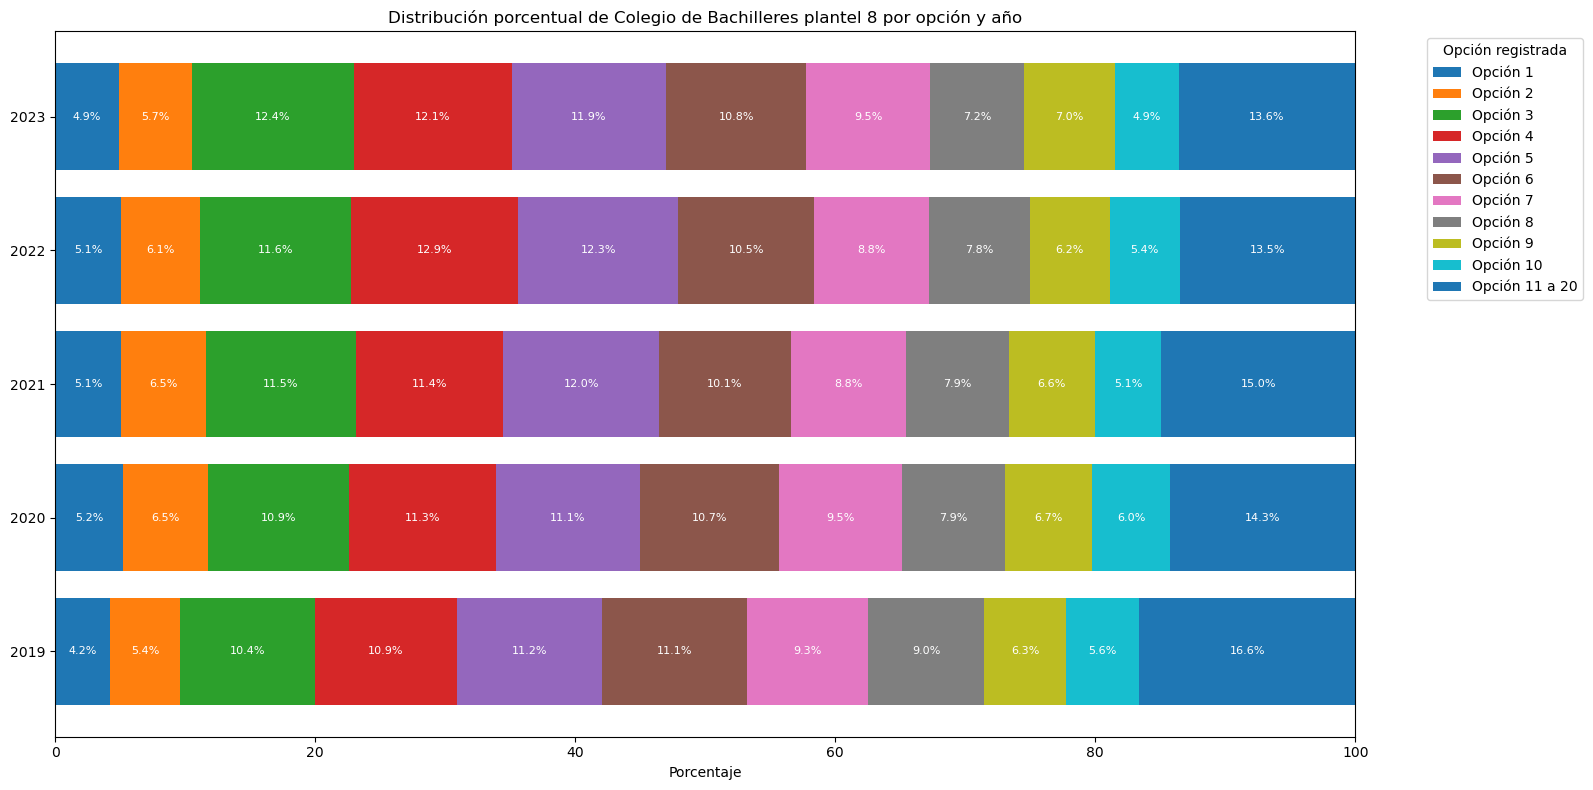

In [115]:
cols = [str(c) for c in datos_agrupados.columns]

datos_agrupados.columns = cols
tabla_grafica = datos_agrupados.set_index("Opcion")[[c for c in cols if c.endswith("_%")]]
tabla_grafica = tabla_grafica.reindex(sorted(tabla_grafica.columns), axis=1)
tabla_grafica_T = tabla_grafica.T
tabla_grafica_T.index = [col.replace("_%", "") for col in tabla_grafica_T.index] 

fig, ax = plt.subplots(figsize=(16, 8))
left = [0] * len(tabla_grafica_T)

for opcion in tabla_grafica_T.columns:
    values = tabla_grafica_T[opcion]
    bars = ax.barh(tabla_grafica_T.index, values, left=left, label=f"Opción {opcion}")
    
    for i, (x, w) in enumerate(zip(left, values)):
        if w > 0:
            ax.text(x + w/2, i, f'{w:.1f}%', ha='center', va='center', fontsize=8, color="white")
    
    left = [x + y for x, y in zip(left, values)]

ax.set_xlim(0, 100)
ax.set_xlabel('Porcentaje')
ax.set_title('Distribución porcentual de Colegio de Bachilleres plantel 8 por opción y año')
ax.legend(title='Opción registrada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Tabla 1.2 Distribución de concursantes que aplicó el examen según entidad de la escuela de procedencia (PENDIENTE)

In [116]:
# Cargamos los catalogos de CCT
CCT19 = pd.read_parquet("2019/BASICA2019.parquet")
CCT20 = pd.read_parquet("2020/BASICA2020.parquet")
CCT21 = pd.read_parquet("2021/BASICA2021.parquet")
CCT22 = pd.read_parquet("2022/BASICA2022.parquet")
CCT23 = pd.read_parquet("2023/BASICA2023.parquet")

In [117]:
CCT19 = CCT19[CCT19['NIVEL']=='SECUNDARIA'].copy()
CCT20 = CCT20[CCT20['NIVEL']=='SECUNDARIA'].copy()
CCT21 = CCT21[CCT21['NIVEL']=='SECUNDARIA'].copy()
CCT22 = CCT22[CCT22['NIVEL']=='SECUNDARIA'].copy()
CCT23 = CCT23[CCT23['NIVEL']=='SECUNDARIA'].copy()


dict_cct = {
    2019: CCT19,
    2020: CCT20,
    2021: CCT23,
    2022: CCT22,
    2023: CCT23
}
sus23['CVE_CCT'] = sus23['CCT']


dict_sus = {
    2019: sus19,
    2020: sus20,
    2021: sus21,
    2022: sus22,
    2023: sus23
}

In [118]:
def construir_tabla_categorias(dict_sus, dict_cct):
    categorias = ["EdoMéx", "CDMX", "Extranjero", "Foráneo"]
    años = [2019, 2020, 2021, 2022, 2023]
    resultados = {}

    for year in años:
        sus = dict_sus[year].copy()
        cct = dict_cct[year].copy()

        cct_uni = cct.drop_duplicates(subset="CLAVECCT", keep="first")

        mapa_entidad = cct_uni.set_index("CLAVECCT")["ENTIDAD"]

        ent = sus["CVE_CCT"].map(mapa_entidad)

        ent_num = pd.to_numeric(ent, errors="coerce")

        def clasificar(x):
            if pd.isna(x):
                return "Extranjero"
            x = int(x)
            if x == 15:
                return "EdoMéx"
            if x == 9:
                return "CDMX"
            if 1 <= x <= 32:
                return "Foráneo"
            return "Desconocido"

        categorias_series = ent_num.apply(clasificar)

        conteo = categorias_series.value_counts().reindex(categorias, fill_value=0)
        resultados[year] = conteo

        total = int(conteo.sum())

    datos_agrupados = pd.DataFrame(resultados).reindex(categorias)
    return datos_agrupados

datos_agrupados = construir_tabla_categorias(dict_sus, dict_cct)

datos_agrupados

,2019,2020,2021,2022,2023
CVE_CCT,,,,,
EdoMéx,158205,155564,142036,146446,146987
CDMX,144010,138931,127285,130340,133896
Extranjero,4998,5245,2533,2660,2494
Foráneo,2946,2969,3493,3150,3195


In [119]:
sus = dict_sus[2021].copy()
cct = dict_cct[2021].drop_duplicates("CLAVECCT")

mapa = cct.set_index("CLAVECCT")["ENTIDAD"]
ent = sus["CVE_CCT"].map(mapa)

faltantes = sus.loc[ent.isna(), "CVE_CCT"].unique()
print(len(faltantes), "CCT no encontrados en catálogo")


340 CCT no encontrados en catálogo


### Tabla 2.1 Distribución porcentual de concursantes que obtuvieron un lugar por opción educativa

In [120]:
dict_opc = dict(sus1923)

resumen = []

for year, df in dict_opc.items():
    conteo = df['INST_FIN'].value_counts()  # Clave de la institución de asignación final

    for clave, cantidad in conteo.items():
        nombre = clvinst.get(clave, "Desconocido")  
        resumen.append({
            "Año": year,
            "Clave": clave,
            "Nombre": nombre,
            "Numero de opciones educativas": cantidad
        })

datos_agrupados = pd.DataFrame(resumen)
datos_agrupados = datos_agrupados.sort_values(["Año", "Clave"]).reset_index(drop=True)

datos_agrupados = datos_agrupados.pivot_table(
    index=["Clave", "Nombre"],             
    columns="Año",                          
    values="Numero de opciones educativas", 
    fill_value=0                           
).reset_index()

datos_agrupados.columns = datos_agrupados.columns.map(str)

cols_years = [col for col in datos_agrupados.columns if col.isdigit()]


for col in cols_years:
    total = datos_agrupados[col].sum()
    datos_agrupados[col + "_%"] = (datos_agrupados[col].astype(float) / total * 100).round(2)

new_order = ["Clave", "Nombre"]
for col in cols_years:
    new_order.append(col)
    new_order.append(col + "_%")

datos_agrupados = datos_agrupados[new_order]
datos_agrupados.to_csv("Tablas/1.10 AsignaciónFinal",index=False)
datos_agrupados

Año,Clave,Nombre,2019,2019_%,2020,2020_%,2021,2021_%,2022,2022_%,2023,2023_%
0,A3,UEMSTAyCM CBTA,1461.0,0.55,1333.0,0.51,1066.0,0.43,1084.0,0.43,965.0,0.38
1,B0,Bachilleres,41038.0,15.52,41239.0,15.71,41549.0,16.88,41726.0,16.69,41695.0,16.60
2,C1,CONALEP,23857.0,9.02,23424.0,8.93,17901.0,7.27,19052.0,7.62,19163.0,7.63
3,D4,UEMSTIS,43026.0,16.27,42918.0,16.35,40482.0,16.44,40834.0,16.34,41460.0,16.51
4,G2,Dirección General del Bachillerato,2137.0,0.81,1985.0,0.76,2006.0,0.81,2009.0,0.80,2103.0,0.84
5,I5,IPN,25813.0,9.76,26838.0,10.23,26222.0,10.65,26129.0,10.45,26281.0,10.46
6,M9,UAEM,215.0,0.08,207.0,0.08,211.0,0.09,202.0,0.08,194.0,0.08
7,S0,SE - COBAEM,7246.0,2.74,7122.0,2.71,6059.0,2.46,6507.0,2.60,6828.0,2.72
8,S1,SE - CONALEP ESTADO DE MÉXICO,15746.0,5.95,16004.0,6.10,13398.0,5.44,13968.0,5.59,14260.0,5.68
9,S2,SE - TELEBACHILLERATO,824.0,0.31,957.0,0.36,719.0,0.29,795.0,0.32,861.0,0.34


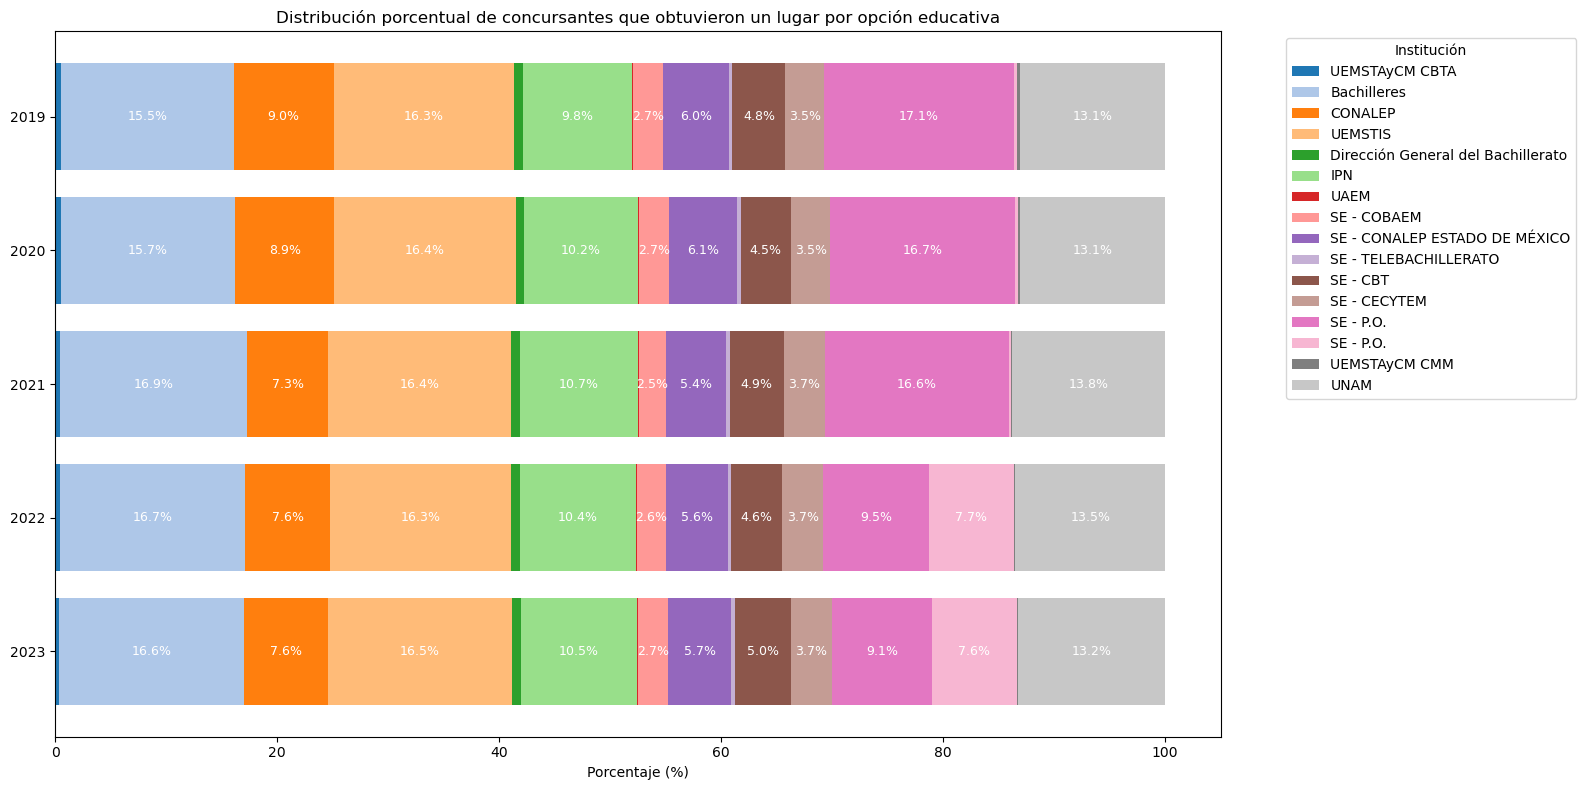

In [121]:

cols_pct = [col for col in datos_agrupados.columns if col.endswith("_%")]

tabla_grafica = datos_agrupados.set_index("Nombre")[cols_pct].T

years = [col.replace("_%", "") for col in tabla_grafica.index]

y_pos = np.arange(len(years))

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(16, 8))

left = np.zeros(len(years))

instituciones = datos_agrupados["Nombre"].values
for i, inst in enumerate(instituciones):
    values = tabla_grafica.iloc[:, i].values  
    bars = ax.barh(y_pos, values, left=left, color=colors[i % len(colors)], label=inst)
    
    for j, (v, l) in enumerate(zip(values, left)):
        if v > 2: 
            ax.text(l + v/2, j, f"{v:.1f}%", ha='center', va='center', color='white', fontsize=9)
    
    left += values

ax.set_yticks(y_pos)
ax.set_yticklabels(years)
ax.invert_yaxis() 
ax.set_xlabel("Porcentaje (%)")
ax.set_title("Distribución porcentual de concursantes que obtuvieron un lugar por opción educativa")
ax.legend(title="Institución", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### Distribución porcentual de concursantes que obtuvieron un lugar por opción bachilleres

In [122]:
clv_colbach = {
    "B001000": "PLANTEL 1, EL ROSARIO",
    "B002000": "PLANTEL 2, CIEN METROS",
    "B003000": "PLANTEL 3, IZTACALCO",
    "B004000": "PLANTEL 4, CULHUACÁN LÁZARO CÁRDENAS",
    "B005000": "PLANTEL 5, SATÉLITE",
    "B006000": "PLANTEL 6, VICENTE GUERRERO",
    "B007000": "PLANTEL 7, IZTAPALAPA",
    "B008000": "PLANTEL 8, CUAJIMALPA",
    "B009000": "PLANTEL 9, ARAGÓN",
    "B010000": "PLANTEL 10, AEROPUERTO",
    "B011000": "PLANTEL 11, NUEVA ATZACOALCO",
    "B012000": "PLANTEL 12, NEZAHUALCÓYOTL",
    "B013000": "PLANTEL 13, XOCHIMILCO TEPEPAN",
    "B014000": "PLANTEL 14, MILPA ALTA",
    "B015000": "PLANTEL 15, CONTRERAS",
    "B016000": "PLANTEL 16, TLÁHUAC",
    "B017000": "PLANTEL 17, HUAYAMILPAS PEDREGAL",
    "B018000": "PLANTEL 18, TLILHUACA AZCAPOTZALCO",
    "B019000": "PLANTEL 19, ECATEPEC",
    "B020000": "PLANTEL 20, DEL VALLE MATÍAS ROMERO"
}


resumen_colbach = []

for año, df in sus1923:
    df_colbach = df[df['ASIG_FIN'].fillna('').str.startswith('B0')]
    conteo = df_colbach['ASIG_FIN'].value_counts() # Asignación final en colbach
    
    for clave, cantidad in conteo.items():
        nombre = clv_colbach.get(clave, "Desconocido")
        resumen_colbach.append({
            "Año": año,
            "Clave": clave,
            "Nombre": nombre,
            "Número de asignaciones": cantidad
        })

df_colbach = pd.DataFrame(resumen_colbach)
df_colbach = df_colbach.sort_values(["Año", "Clave"]).reset_index(drop=True)

datos_agrupados = df_colbach.pivot_table(
    index=["Clave", "Nombre"],
    columns="Año",
    values="Número de asignaciones",
    fill_value=0
).reset_index()

cols_years = [col for col in datos_agrupados.columns if isinstance(col, int)]
for col in cols_years:
    total = datos_agrupados[col].sum()
    datos_agrupados[str(col) + "_%"] = (datos_agrupados[col] / total * 100).round(2)

new_order = ["Clave", "Nombre"]
for col in cols_years:
    new_order.append(col)                 
    new_order.append(str(col) + "_%")    
df_colbach_pivot = datos_agrupados[new_order]

datos_agrupados.columns = datos_agrupados.columns.map(str)

datos_agrupados.to_csv("Tablas/1.10.1 AsignaciónFinalCol",index=False)

datos_agrupados

Año,Clave,Nombre,2019,2020,2021,2022,2023,2019_%,2020_%,2021_%,2022_%,2023_%
0,B001000,"PLANTEL 1, EL ROSARIO",3188.0,3428.0,3535.0,3699.0,3666.0,7.77,8.31,8.51,8.86,8.79
1,B002000,"PLANTEL 2, CIEN METROS",3322.0,3036.0,3137.0,3090.0,3118.0,8.09,7.36,7.55,7.41,7.48
2,B003000,"PLANTEL 3, IZTACALCO",3252.0,3222.0,3207.0,3573.0,3520.0,7.92,7.81,7.72,8.56,8.44
3,B004000,"PLANTEL 4, CULHUACÁN LÁZARO CÁRDENAS",3465.0,3509.0,3356.0,3258.0,3312.0,8.44,8.51,8.08,7.81,7.94
4,B005000,"PLANTEL 5, SATÉLITE",3211.0,3159.0,3226.0,3251.0,3208.0,7.82,7.66,7.76,7.79,7.69
5,B006000,"PLANTEL 6, VICENTE GUERRERO",3242.0,3409.0,3393.0,3401.0,3378.0,7.90,8.27,8.17,8.15,8.10
6,B007000,"PLANTEL 7, IZTAPALAPA",2518.0,2460.0,2514.0,2514.0,2618.0,6.14,5.97,6.05,6.03,6.28
7,B008000,"PLANTEL 8, CUAJIMALPA",1346.0,1136.0,1196.0,1154.0,1163.0,3.28,2.75,2.88,2.77,2.79
8,B009000,"PLANTEL 9, ARAGÓN",2478.0,2640.0,2770.0,2777.0,2752.0,6.04,6.40,6.67,6.66,6.60
9,B010000,"PLANTEL 10, AEROPUERTO",2173.0,2280.0,2265.0,2329.0,2291.0,5.30,5.53,5.45,5.58,5.49


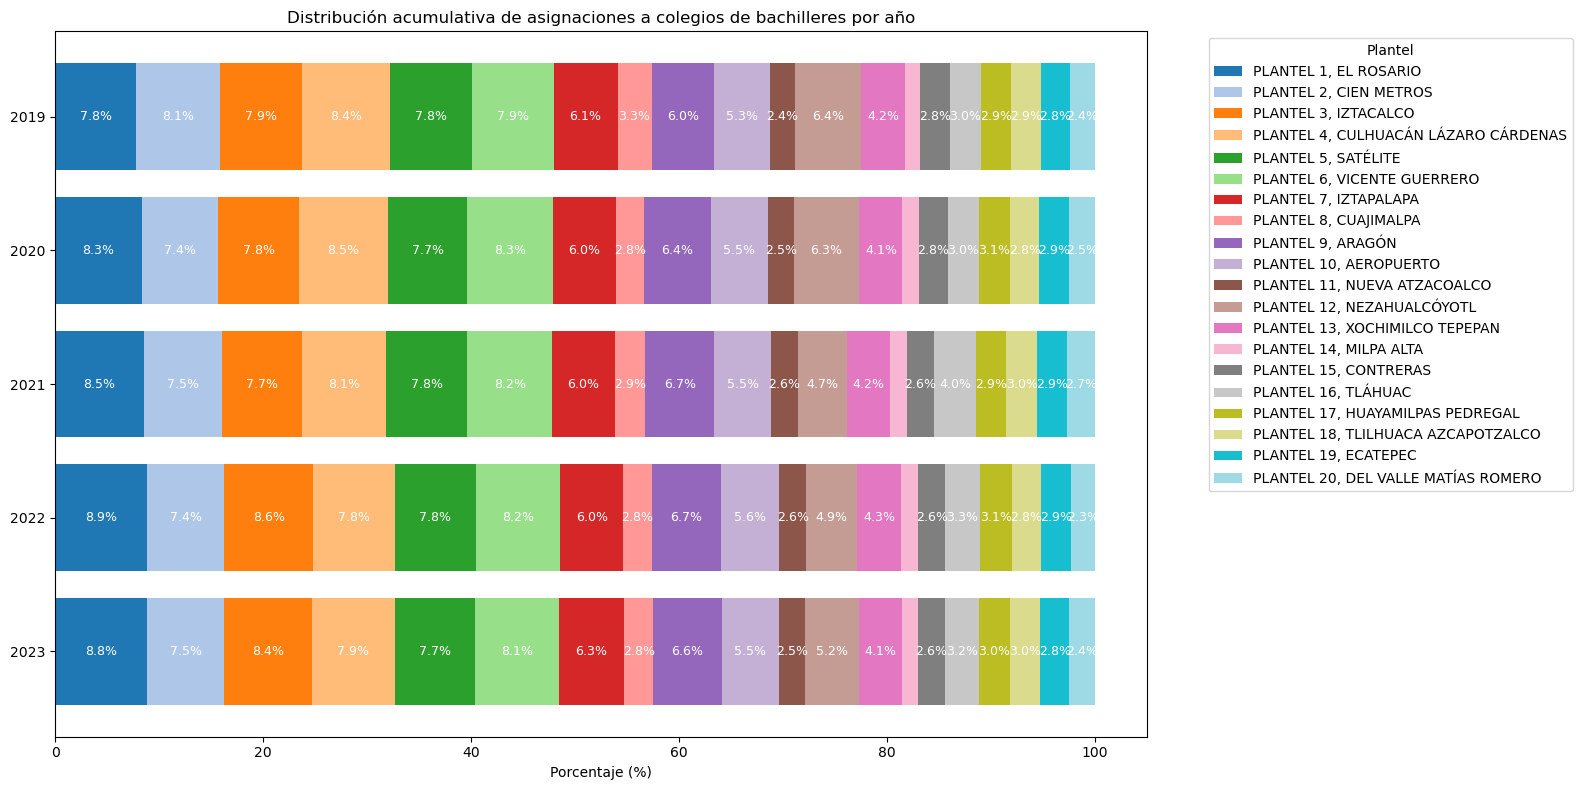

In [123]:
cols_pct = [col for col in datos_agrupados.columns if col.endswith("_%")]
tabla_grafica = datos_agrupados.set_index("Nombre")[cols_pct].T
years = [col.replace("_%", "") for col in tabla_grafica.index]
y_pos = np.arange(len(years))
instituciones = datos_agrupados["Nombre"].values
colors = plt.cm.tab20.colors


fig, ax = plt.subplots(figsize=(16, 8))
left = np.zeros(len(years))

for i, inst in enumerate(instituciones):
    values = tabla_grafica.iloc[:, i].values
    bars = ax.barh(y_pos, values, left=left, color=colors[i % len(colors)], label=inst)
    
    for j, (v, l) in enumerate(zip(values, left)):
        if v > 2:
            ax.text(l + v/2, j, f"{v:.1f}%", ha='center', va='center', color='white', fontsize=9)
    
    left += values

ax.set_yticks(y_pos)
ax.set_yticklabels(years)
ax.invert_yaxis()
ax.set_xlabel("Porcentaje (%)")
ax.set_title("Distribución acumulativa de asignaciones a colegios de bachilleres por año")
ax.legend(title="Plantel", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Tabla 2.2 Distribución porcentual de concursantes que obtuvieron un lugar por opción educativa según el tipo de escuela de procedencia (PENDIENTE)


#### Tabla 3.1 Promedio del número de aciertos obtenido por los sustentantes asignados por opción educativa


In [124]:
resumen_puntajes = []

for year, df in sus1923:
    if 'NGLOBAL' not in df.columns:
        continue
    
    for clave, grupo in df.groupby('INST_FIN'):
        nombre = clvinst.get(clave, "Desconocido")
        minimo = grupo['NGLOBAL'].min() # Minimo de aciertos
        maximo = grupo['NGLOBAL'].max()# Máximo de aciertos
        promedio = grupo['NGLOBAL'].mean()# Promedio de aciertos
        
        resumen_puntajes.append({
            "Año": year,
            "Clave": clave,
            "Nombre": nombre,
            "Mínimo": minimo,
            "Máximo": maximo,
            "Promedio": round(promedio, 2)
        })

df_puntajes = pd.DataFrame(resumen_puntajes)
df_puntajes = df_puntajes.sort_values(["Año", "Clave"]).reset_index(drop=True)
df_puntajes

estadisticas = ["Mínimo", "Promedio", "Máximo"]

filas = []

for nombre, grupo in df_puntajes.groupby("Nombre"):
    for stat in estadisticas:
        fila = {"Puntuaje": stat, "Nombre": nombre}
        for year in [2019, 2020, 2021, 2022, 2023]:
            valor = grupo.loc[grupo["Año"] == year, stat].values
            fila[year] = valor[0] if len(valor) > 0 else None
        filas.append(fila)

datos_agrupados = pd.DataFrame(filas)

datos_agrupados = datos_agrupados.sort_values(["Nombre", "Puntuaje"]).reset_index(drop=True)

datos_agrupados.to_csv("Tablas/1.11 AciertosCompletos",index=False)
datos_agrupados

,Puntuaje,Nombre,2019,2020,2021,2022,2023
0,Máximo,Bachilleres,117.00,120.00,117.00,116.00,117.00
1,Mínimo,Bachilleres,23.00,21.00,22.00,19.00,22.00
2,Promedio,Bachilleres,72.90,72.26,68.20,68.30,68.45
3,Máximo,CONALEP,118.00,124.00,117.00,116.00,111.00
4,Mínimo,CONALEP,14.00,11.00,6.00,8.00,11.00
5,Promedio,CONALEP,53.96,53.72,53.85,53.73,52.90
6,Máximo,Dirección General del Bachillerato,112.00,105.00,108.00,114.00,108.00
7,Mínimo,Dirección General del Bachillerato,65.00,65.00,58.00,57.00,55.00
8,Promedio,Dirección General del Bachillerato,77.18,76.35,72.18,70.99,69.12
9,Máximo,IPN,127.00,126.00,126.00,126.00,126.00


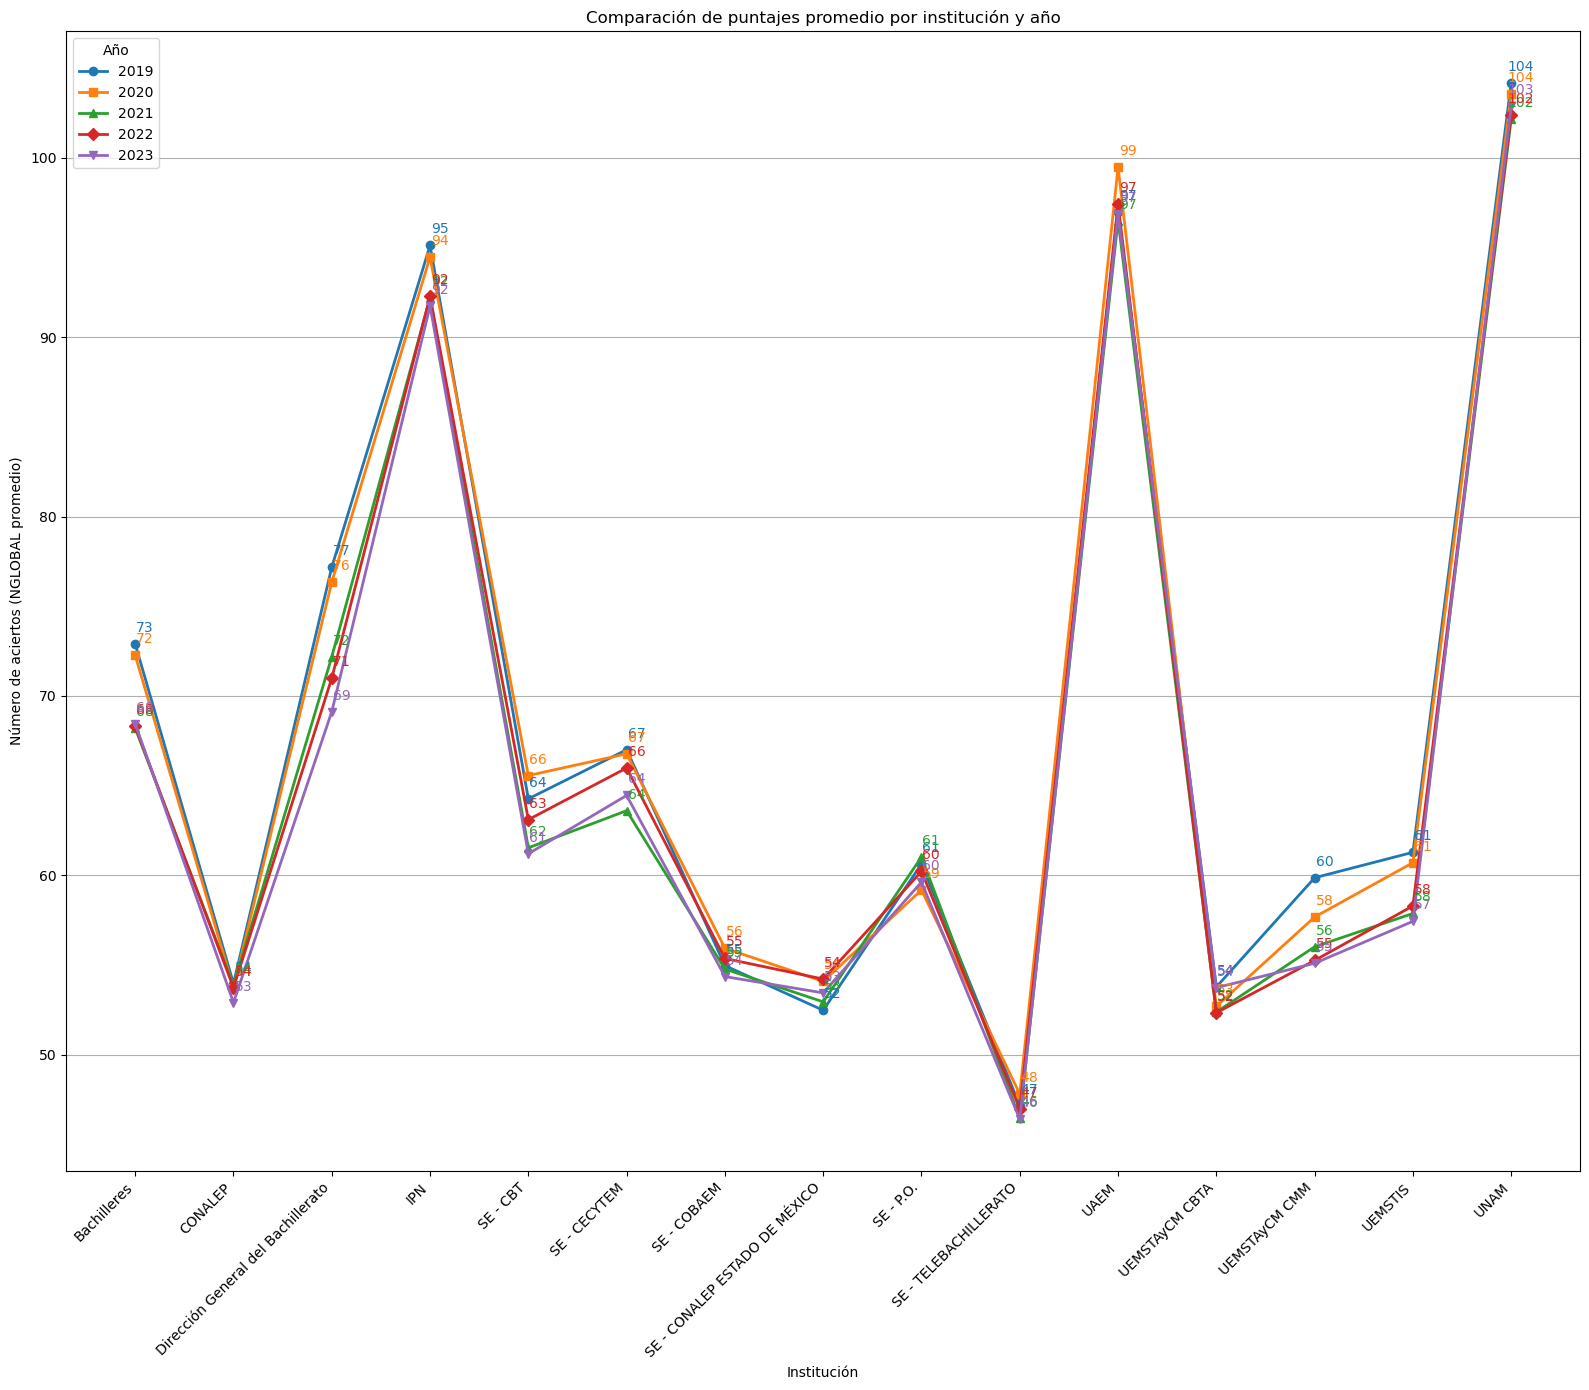

In [125]:
df_promedios = df_puntajes.groupby(["Nombre", "Año"])["Promedio"].mean().reset_index()
df_promedios_pivot = df_promedios.pivot(index="Nombre", columns="Año", values="Promedio")

instituciones = df_promedios_pivot.index
x = np.arange(len(instituciones))

plt.figure(figsize=(16, 14))

colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'v']

for i, year in enumerate(df_promedios_pivot.columns):
    y = df_promedios_pivot[year]
    plt.plot(x, y, label=str(year), marker=markers[i % len(markers)],
             color=colors[i % len(colors)], linewidth=2)
    
    for xi, yi in zip(x, y):
        plt.text(xi+0.1, yi + 0.5, f"{yi:.0f}", ha='center', va='bottom', color=colors[i % len(colors)], fontsize=10)

plt.xticks(x, instituciones, rotation=45, ha='right')
plt.xlabel("Institución")
plt.ylabel("Número de aciertos (NGLOBAL promedio)")
plt.title("Comparación de puntajes promedio por institución y año")
plt.legend(title="Año")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Aciertos obtenidos por los sustentantes asignados por opción bachillerato

In [126]:
estadisticas = ["Mínimo", "Promedio", "Máximo"]

resumen_colbach_puntajes = []

for año, df in sus1923:

    df_colbach = df[df['ASIG_FIN'].fillna('').str.startswith('B0')] # Asignacion final colbach

    for clave, grupo in df_colbach.groupby('ASIG_FIN'):
        nombre = clv_colbach.get(clave, "Desconocido")
        
        minimo = grupo['NGLOBAL'].min()
        maximo = grupo['NGLOBAL'].max()
        promedio = grupo['NGLOBAL'].mean()
        
        resumen_colbach_puntajes.append({
            "Año": año,
            "Nombre": nombre,
            "Mínimo": minimo,
            "Promedio": round(promedio, 2),
            "Máximo": maximo
        })

df_colbach_puntajes = pd.DataFrame(resumen_colbach_puntajes)

filas = []
for nombre, grupo in df_colbach_puntajes.groupby("Nombre"):
    for stat in estadisticas:
        fila = {"Puntuaje": stat, "Nombre": nombre}
        for year in [2019, 2020, 2021, 2022, 2023]:
            valor = grupo.loc[grupo["Año"] == year, stat].values
            fila[year] = valor[0] if len(valor) > 0 else None
        filas.append(fila)

datos_agrupados = pd.DataFrame(filas)
datos_agrupados = datos_agrupados.sort_values(["Nombre", "Puntuaje"]).reset_index(drop=True)

datos_agrupados.to_csv("Tablas/1.11.1 AciertosCompletosCol",index=False)

datos_agrupados


,Puntuaje,Nombre,2019,2020,2021,2022,2023
0,Máximo,"PLANTEL 1, EL ROSARIO",109.00,107.00,109.00,106.00,114.00
1,Mínimo,"PLANTEL 1, EL ROSARIO",64.00,63.00,57.00,56.00,56.00
2,Promedio,"PLANTEL 1, EL ROSARIO",73.51,72.71,67.68,67.24,67.21
3,Máximo,"PLANTEL 10, AEROPUERTO",106.00,110.00,98.00,104.00,110.00
4,Mínimo,"PLANTEL 10, AEROPUERTO",53.00,50.00,42.00,41.00,43.00
5,Promedio,"PLANTEL 10, AEROPUERTO",66.46,63.83,58.56,57.80,58.64
6,Máximo,"PLANTEL 11, NUEVA ATZACOALCO",104.00,98.00,102.00,99.00,102.00
7,Mínimo,"PLANTEL 11, NUEVA ATZACOALCO",53.00,51.00,41.00,42.00,43.00
8,Promedio,"PLANTEL 11, NUEVA ATZACOALCO",63.56,61.70,55.02,56.21,55.78
9,Máximo,"PLANTEL 12, NEZAHUALCÓYOTL",111.00,108.00,107.00,107.00,109.00


### Aciertos para diferentes bachilleres

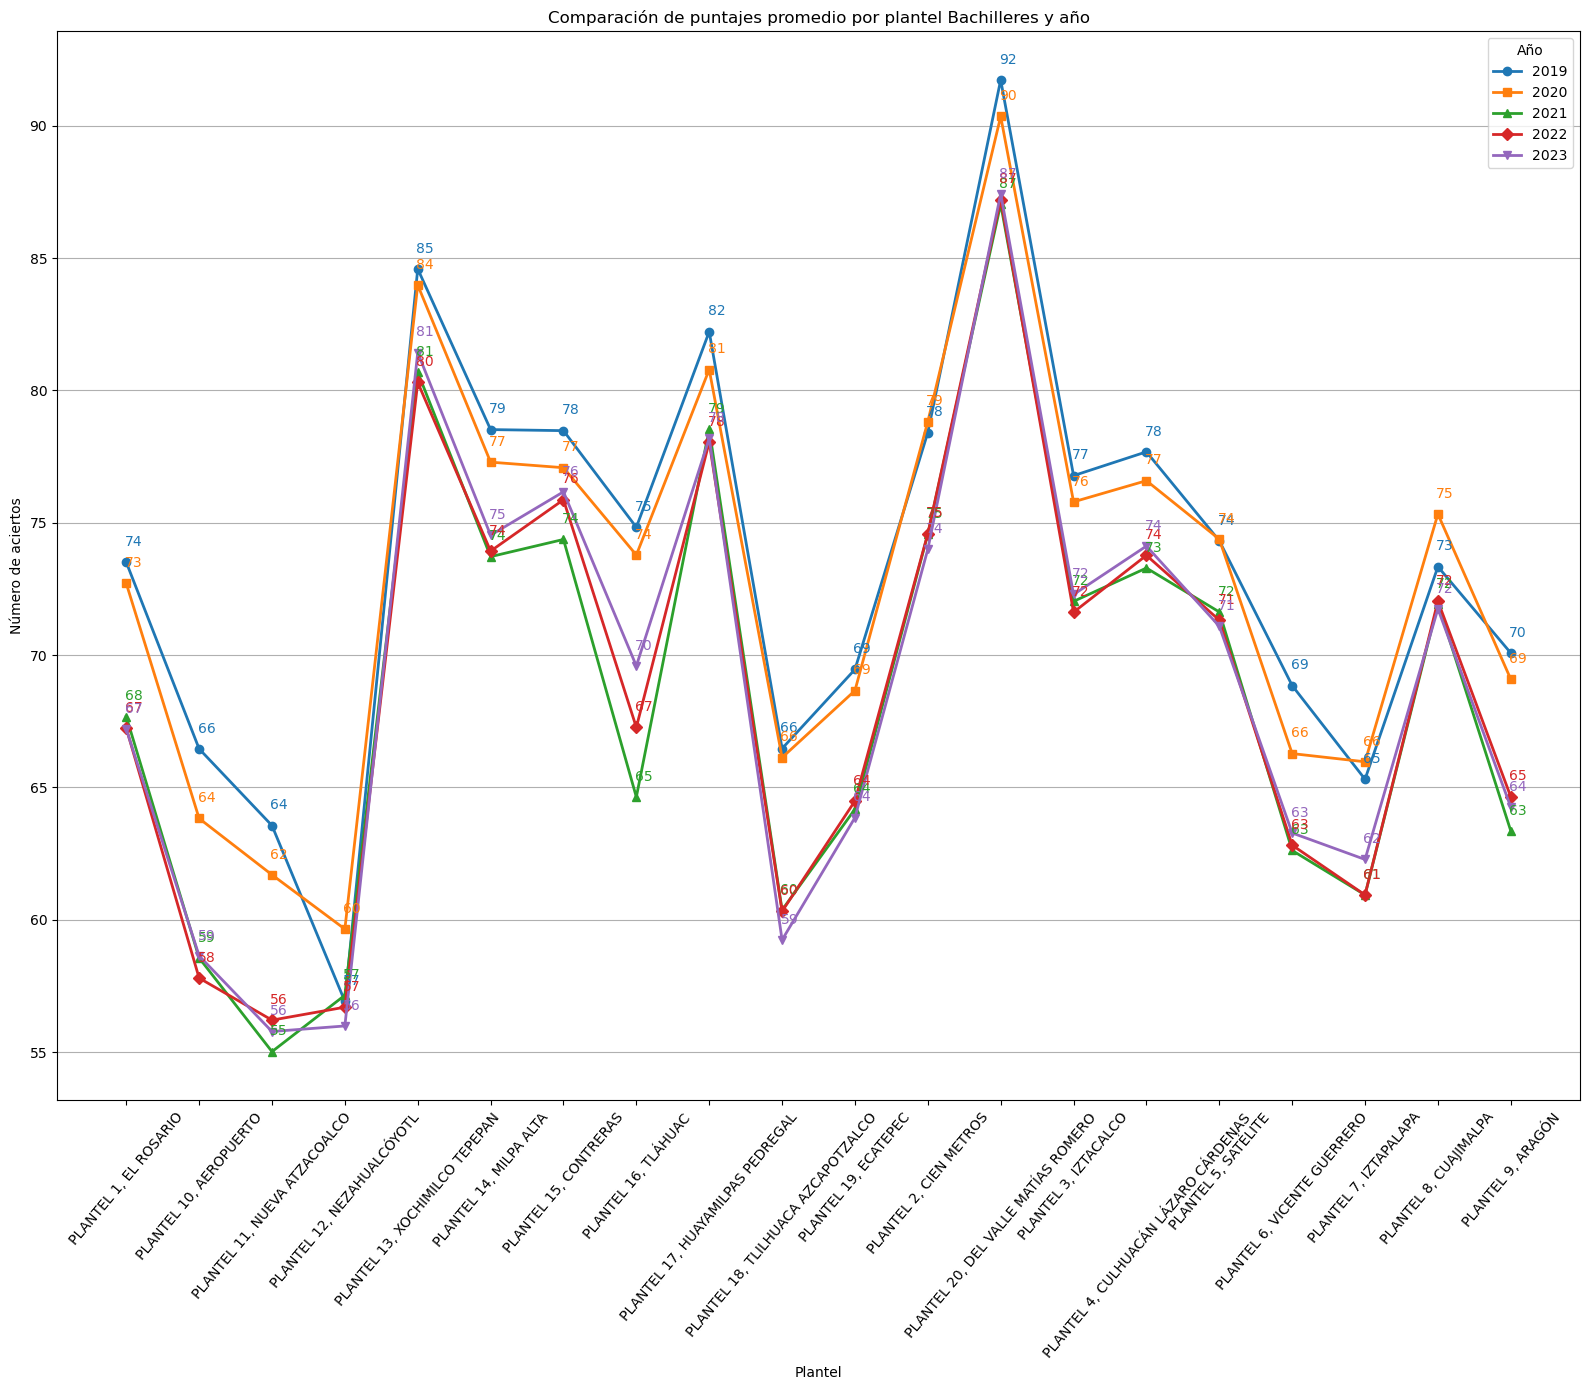

In [127]:
df_promedios_colbach = df_colbach_puntajes.groupby(["Nombre", "Año"])["Promedio"].mean().reset_index()

df_promedios_pivot = df_promedios_colbach.pivot(index="Nombre", columns="Año", values="Promedio")

planteles = df_promedios_pivot.index
x = np.arange(len(planteles))

plt.figure(figsize=(16, 14))

colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'v']

for i, year in enumerate(df_promedios_pivot.columns):
    y = df_promedios_pivot[year]
    plt.plot(x, y, label=str(year), marker=markers[i % len(markers)],
             color=colors[i % len(colors)], linewidth=2)
    
    for xi, yi in zip(x, y):
        plt.text(xi + 0.1, yi + 0.5, f"{yi:.0f}", ha='center', va='bottom', color=colors[i % len(colors)], fontsize=10)

plt.xticks(x, planteles, rotation=50)
plt.xlabel("Plantel")
plt.ylabel("Número de aciertos")
plt.title("Comparación de puntajes promedio por plantel Bachilleres y año")
plt.legend(title="Año")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Aciertos para el Bachilleres plantel 8

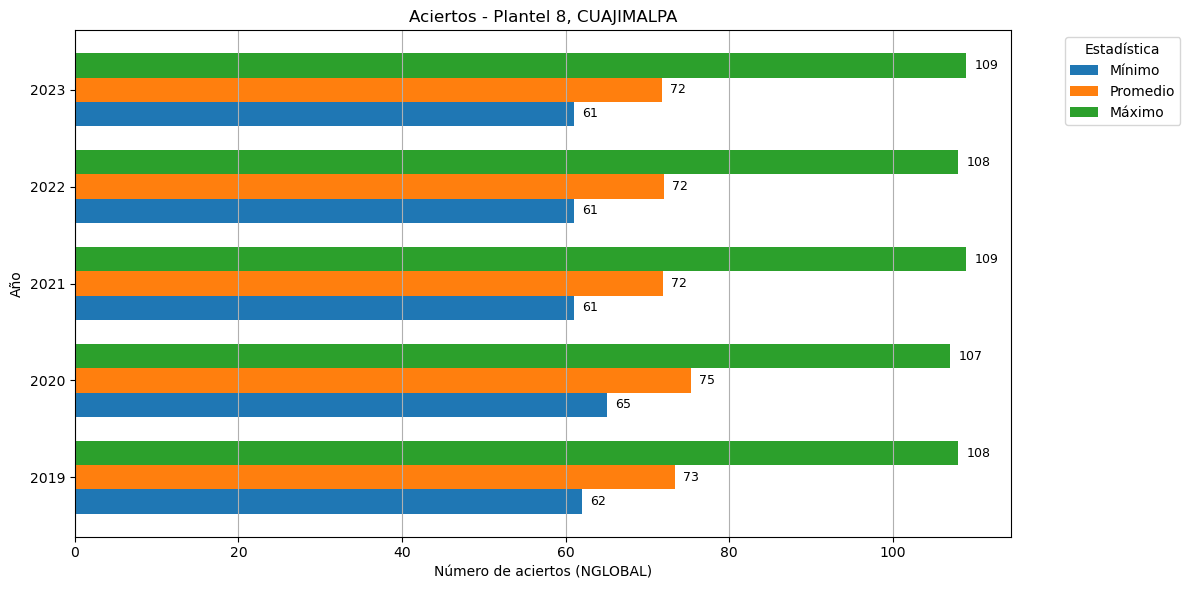

In [128]:
plantel8 = df_colbach_puntajes[df_colbach_puntajes["Nombre"] == "PLANTEL 8, CUAJIMALPA"]

plantel8.to_csv("Tablas/1.11.2 AciertosCompletosCol8",index=False)

años = [2019, 2020, 2021, 2022, 2023]
x = np.arange(len(años)) 

stats = ["Mínimo", "Promedio", "Máximo"]

plt.figure(figsize=(12, 6))

bar_width = 0.25  
offset = 1

for i, stat in enumerate(stats):
    y = plantel8[stat].values

    plt.barh(x + i*bar_width, y, height=bar_width, label=stat)

    for xi, yi in zip(x, y):
        plt.text(yi + offset, xi + i*bar_width, f"{yi:.0f}", va='center',
                 fontsize=9)


plt.yticks(x + bar_width, años)

plt.ylabel("Año")
plt.xlabel("Número de aciertos (NGLOBAL)")
plt.title("Aciertos - Plantel 8, CUAJIMALPA")
plt.legend(title="Estadística", bbox_to_anchor=(1.05, 1), loc="upper left") 
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### Tabla 3.3 Promedio de aciertos por habilidad o área del conocimiento obtenido por la totalidad de los concursantes asignados

In [129]:
# Columnas para cada área de conocimiento
cols_areas = ["PNHV","PNESP","PNHIS","PNGEO","PNFCE","PNHM","PNMAT","PNFIS","PNQUI","PNBIO"]

nombres_areas = [
    "Habilidad verbal",
    "Español",
    "Historia",
    "Geografía",
    "Formación cívica y ética",
    "Habilidad matemática",
    "Matemáticas",
    "Física",
    "Química",
    "Biología"
]


resumen_areas = []

for year, df in sus1923:

    for clave, grupo in df.groupby("INST_FIN"):
        nombre = clvinst.get(clave, "Desconocido")
        fila = {"Nombre": nombre, "Año": year}
        for col, area in zip(cols_areas, nombres_areas):
            fila[area] = grupo[col].mean().round(2) if col in grupo.columns else None
        resumen_areas.append(fila)

datos_agrupados = pd.DataFrame(resumen_areas)

datos_agrupados = datos_agrupados.sort_values(["Nombre", "Año"]).reset_index(drop=True)

datos_agrupados.to_csv("Tablas/1.12 PorcentajeAreas",index=False)

datos_agrupados

,Nombre,Año,Habilidad verbal,Español,Historia,Geografía,Formación cívica y ética,Habilidad matemática,Matemáticas,Física,Química,Biología
0,Bachilleres,2019,59.41,59.59,54.92,56.26,52.11,63.35,48.64,57.67,54.59,60.07
1,Bachilleres,2020,60.46,56.73,56.33,56.52,59.65,59.03,49.27,54.17,52.26,57.90
2,Bachilleres,2021,55.55,55.65,50.61,56.03,53.23,57.64,45.37,55.11,47.59,53.78
3,Bachilleres,2022,55.67,54.75,50.65,55.07,56.00,59.56,44.37,52.29,49.40,53.02
4,Bachilleres,2023,55.44,55.51,51.62,54.22,54.75,54.94,45.58,54.83,52.18,54.57
...,...,...,...,...,...,...,...,...,...,...,...,...
75,UNAM,2019,81.04,83.34,80.29,77.71,75.90,85.02,79.07,82.05,82.85,85.45
76,UNAM,2020,81.82,81.96,82.67,77.53,81.38,82.97,78.01,80.73,79.93,80.94
77,UNAM,2021,80.84,79.63,77.92,77.67,78.95,84.03,76.24,84.70,78.64,77.91
78,UNAM,2022,80.89,80.25,77.79,76.58,79.93,85.71,77.88,82.83,78.59,77.28


#### Promedio de aciertos por habilidad o área del conocimiento obtenido por la totalidad de los concursantes asignados (Bachilleres)

In [130]:
nombres_areas = [
    "Habilidad verbal","Español","Historia","Geografía",
    "Formación cívica y ética","Habilidad matemática","Matemáticas",
    "Física","Química","Biología"
]
col_to_name = dict(zip(cols_areas, nombres_areas))


datos_agrupados = colbach.groupby('AÑO')[cols_areas].mean().reset_index().sort_values('AÑO').round(2)

datos_agrupados.to_csv("Tablas/1.12.1 PorcentajeAreasCol",index=False)

datos_agrupados

,AÑO,PNHV,PNESP,PNHIS,PNGEO,PNFCE,PNHM,PNMAT,PNFIS,PNQUI,PNBIO
0,2019,59.41,59.59,54.92,56.26,52.11,63.35,48.64,57.67,54.59,60.07
1,2020,60.46,56.73,56.33,56.52,59.65,59.03,49.27,54.17,52.26,57.90
2,2021,55.55,55.65,50.61,56.03,53.23,57.64,45.37,55.11,47.59,53.78
3,2022,55.67,54.75,50.65,55.07,56.00,59.56,44.37,52.29,49.40,53.02
4,2023,55.44,55.51,51.62,54.22,54.75,54.94,45.58,54.83,52.18,54.57


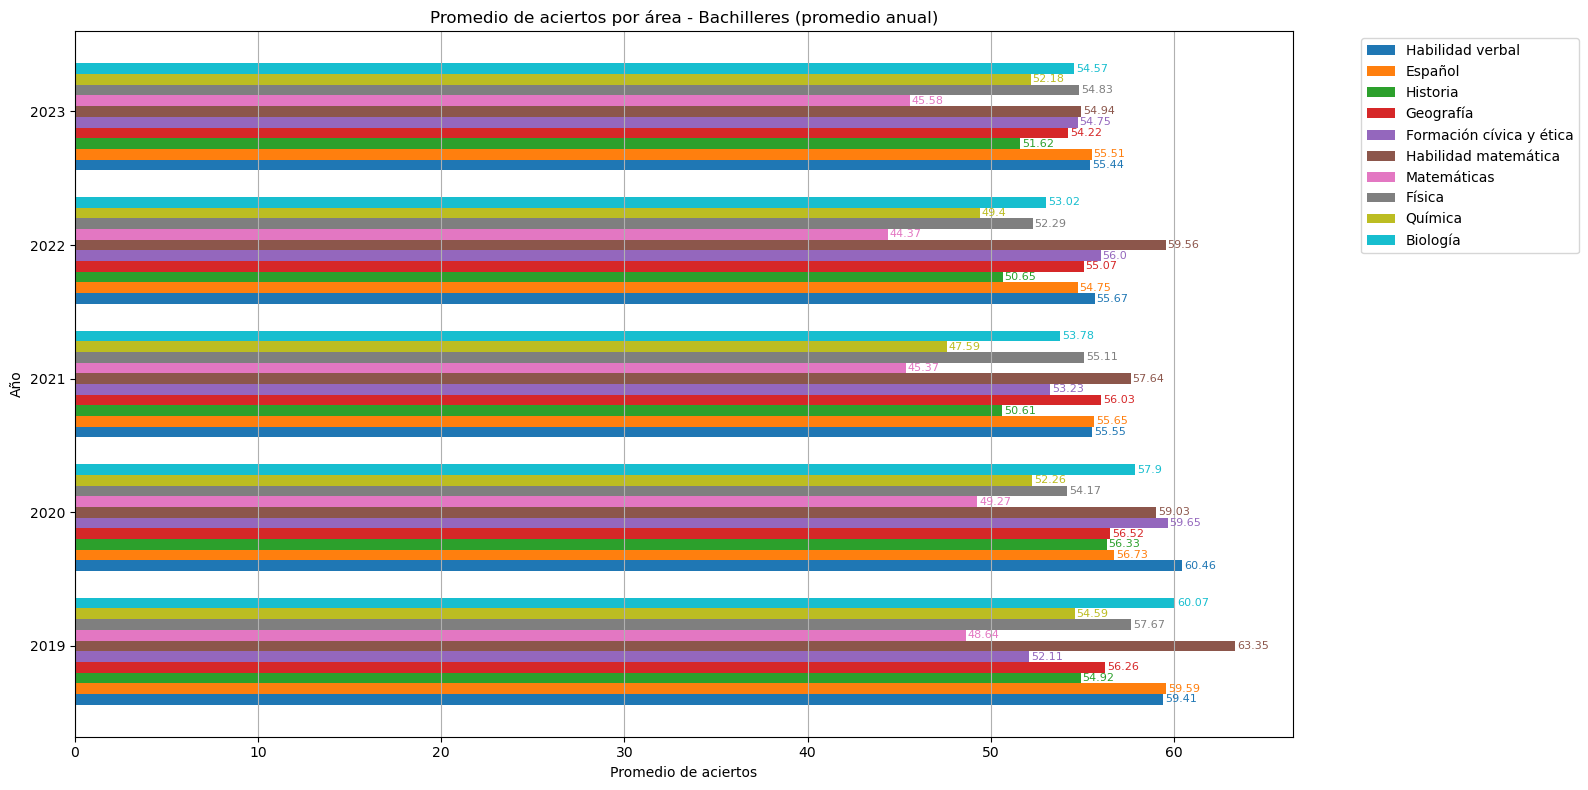

In [131]:
plt.figure(figsize=(16,8))

años = [2019, 2020, 2021, 2022, 2023]
y = np.arange(len(años)) 

bar_height = 0.08 

for i, col in enumerate(cols_areas):
    if col in datos_agrupados.columns:
        valores = datos_agrupados[col].values

        posiciones = y + i*bar_height - (len(cols_areas)/2)*bar_height
        bars = plt.barh(posiciones, valores, height=bar_height, label=col_to_name[col])

        for py, val in zip(posiciones, valores):
            plt.text(val + 0.1, py, str(val), va='center', fontsize=8, color=bars[0].get_facecolor())

plt.title('Promedio de aciertos por área - Bachilleres (promedio anual)')
plt.ylabel('Año')
plt.xlabel('Promedio de aciertos')
plt.yticks(y, años) 
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='x') 
plt.tight_layout()
plt.show()


### Promedio de aciertos por habilidad o área del conocimiento obtenido por la totalidad de los concursantes asignados (Bachilleres plantel 8)

In [132]:
cols_areas = ["NHV","NESP","NHIS","NGEO","NFCE","NHM","NMAT","NFIS","NQUI","NBIO"]
nombres_areas = [
    "Habilidad verbal","Español","Historia","Geografía",
    "Formación cívica y ética","Habilidad matemática","Matemáticas",
    "Física","Química","Biología"
]
col_to_name = dict(zip(cols_areas, nombres_areas))


datos_agrupados = colbach8.groupby('AÑO')[cols_areas].mean().reset_index().sort_values('AÑO').round(2)

datos_agrupados.to_csv("Tablas/1.12.2 PorcentajeAreasCol8",index=False)
datos_agrupados

,AÑO,NHV,NESP,NHIS,NGEO,NFCE,NHM,NMAT,NFIS,NQUI,NBIO
0,2019,9.68,7.11,6.68,6.92,6.30,10.42,5.80,6.86,6.37,7.20
1,2020,10.13,7.10,7.00,7.14,7.34,9.84,6.20,6.73,6.58,7.28
2,2021,9.50,7.00,6.36,7.09,6.78,9.83,5.86,6.89,5.97,6.66
3,2022,9.39,6.81,6.50,6.98,7.11,10.06,5.62,6.69,6.26,6.62
4,2023,9.37,6.98,6.41,6.92,6.93,9.27,5.69,6.88,6.51,6.79


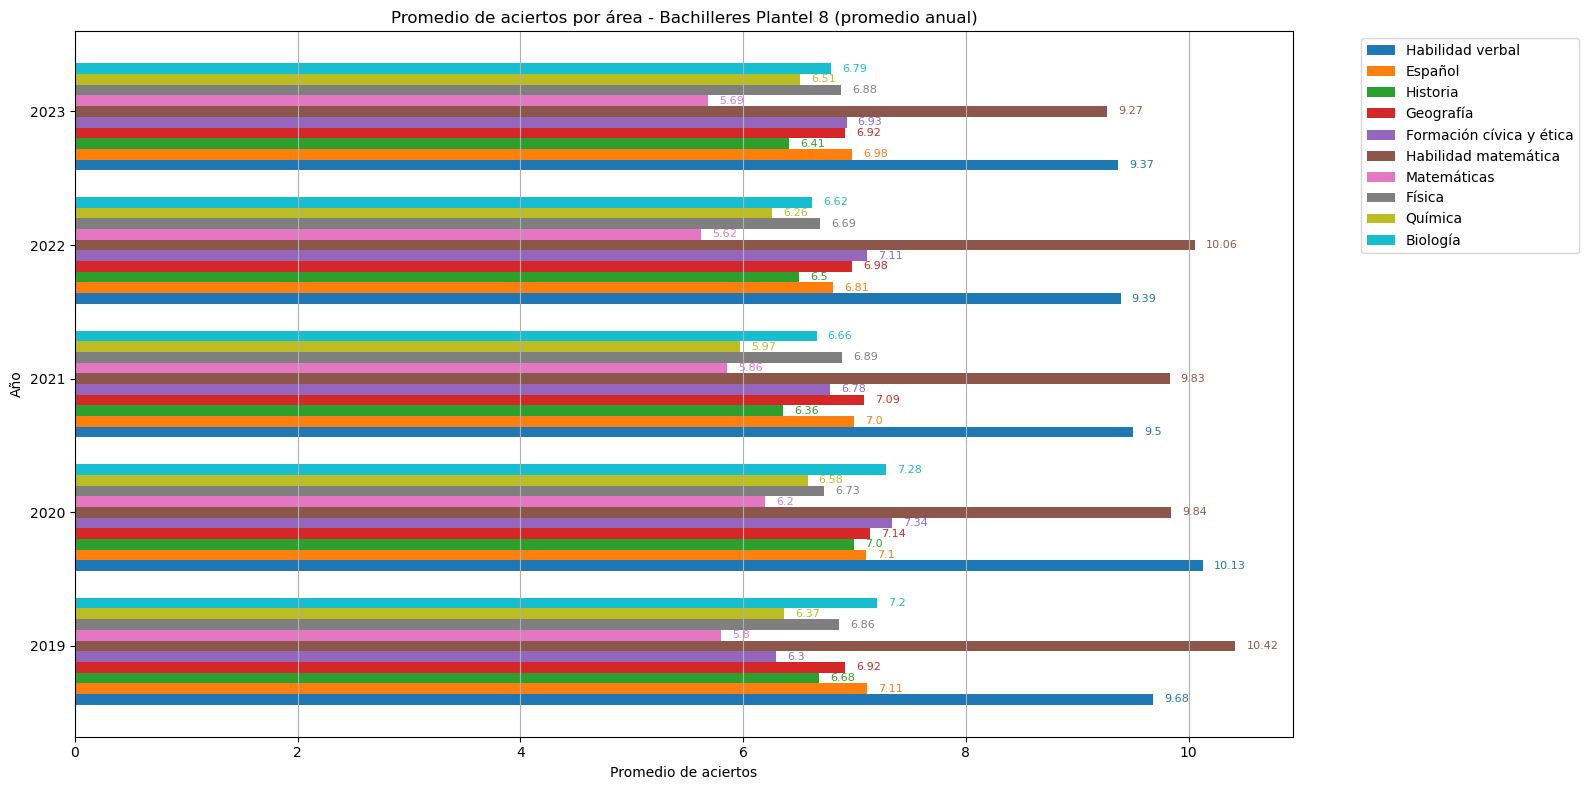

In [133]:
plt.figure(figsize=(16,8))

años = [2019, 2020, 2021, 2022, 2023]
y = np.arange(len(años)) 

bar_height = 0.08 

for i, col in enumerate(cols_areas):
    if col in datos_agrupados.columns:
        valores = datos_agrupados[col].values

        posiciones = y + i*bar_height - (len(cols_areas)/2)*bar_height
        bars = plt.barh(posiciones, valores, height=bar_height, label=col_to_name[col])

        for py, val in zip(posiciones, valores):
            plt.text(val + 0.1, py, str(val), va='center', fontsize=8, color=bars[0].get_facecolor())

plt.title('Promedio de aciertos por área - Bachilleres Plantel 8 (promedio anual)')
plt.ylabel('Año')
plt.xlabel('Promedio de aciertos')
plt.yticks(y, años) 
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='x') 
plt.tight_layout()
plt.show()
